# Compare multi fitted atmospheric parameters with MERRA2

- author Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : April 25th 2023
- last update : April 25th 2023

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import os,sys,re

from astropy.io import fits
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec
%matplotlib inline
import pickle
import seaborn as sns
import copy
from collections import OrderedDict

In [2]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [3]:
import time
from datetime import datetime,date
from astropy.time import Time
import dateutil.parser
import pytz

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

# Config

## MERRA2

In [5]:
path_merra2="data/merra2"
files_merra2=["MERRA2_2022_inst1_2d_asm_Nx_M2I1NXASM_lsst_AllYear.csv","MERRA2_2023_inst1_2d_asm_Nx_M2I1NXASM_lsst_AllYear.csv"]

In [6]:
all_merra2 = []
for file in files_merra2:
    merra2 = pd.read_csv(os.path.join(path_merra2,file))
    all_merra2.append(merra2)

In [7]:
merra2 = pd.concat(all_merra2,axis=0)

In [8]:
all_merra2_datetime = [ Time(str_time).to_datetime() for str_time in merra2['time'] ]
pwv_merra2 = merra2['TQV']
oz_merra2 = merra2['TO3']

Text(0.5, 1.0, 'precipitable water vapor in MERRA2 in 2022 and 2023')

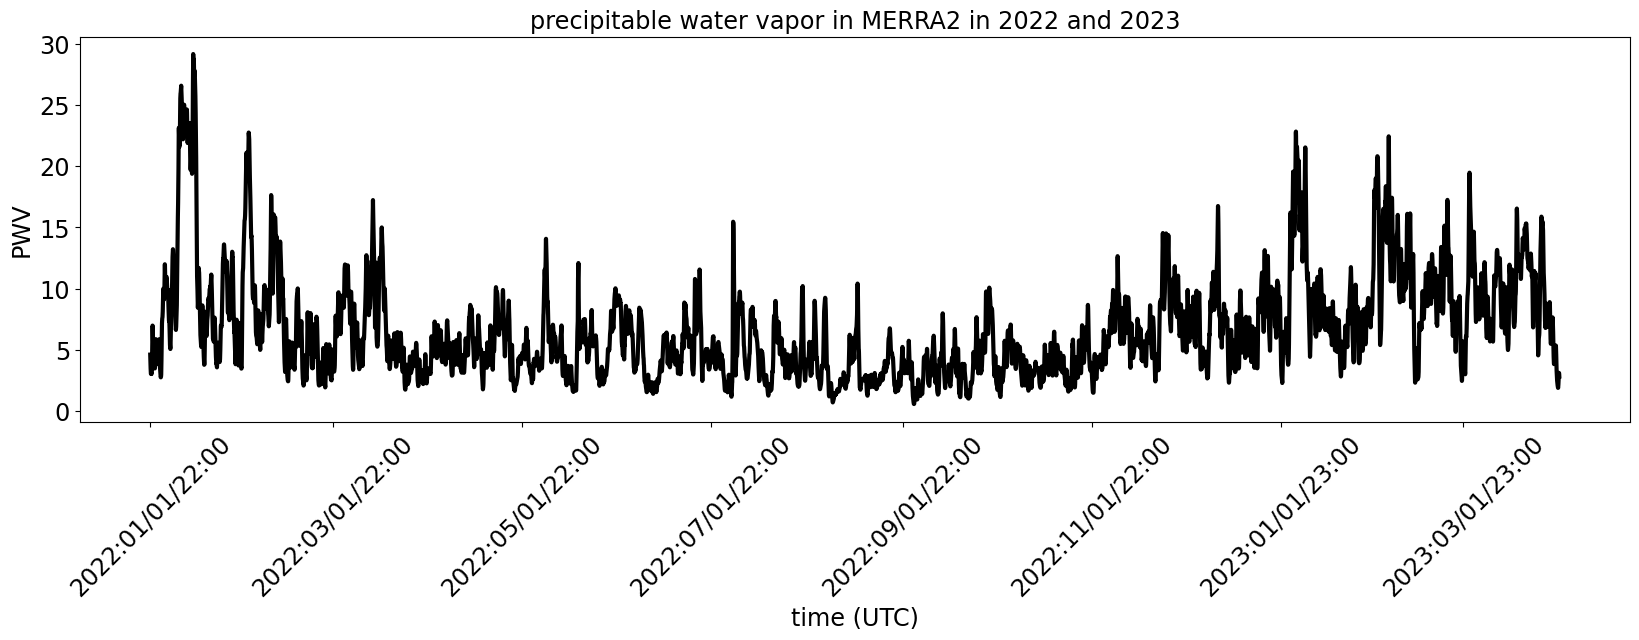

In [9]:
fig=plt.figure(figsize=(20,5))
    
ax=fig.add_subplot(111)
#myFmt = mdates.DateFormatter('%H:%M')
myFmt = mdates.DateFormatter('%Y:%D:%H')
ax.xaxis.set_major_formatter(myFmt)

ax.plot(all_merra2_datetime,pwv_merra2 ,'-',color='k',lw=3)
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel("time (UTC)")
ax.set_ylabel("PWV")
ax.set_title('precipitable water vapor in MERRA2 in 2022 and 2023')

In [10]:
all_merra2_datetime = [ Time(str_time).to_datetime() for str_time in merra2['time'] ]
oz_merra2 = merra2['TO3']

(0.0, 600.0)

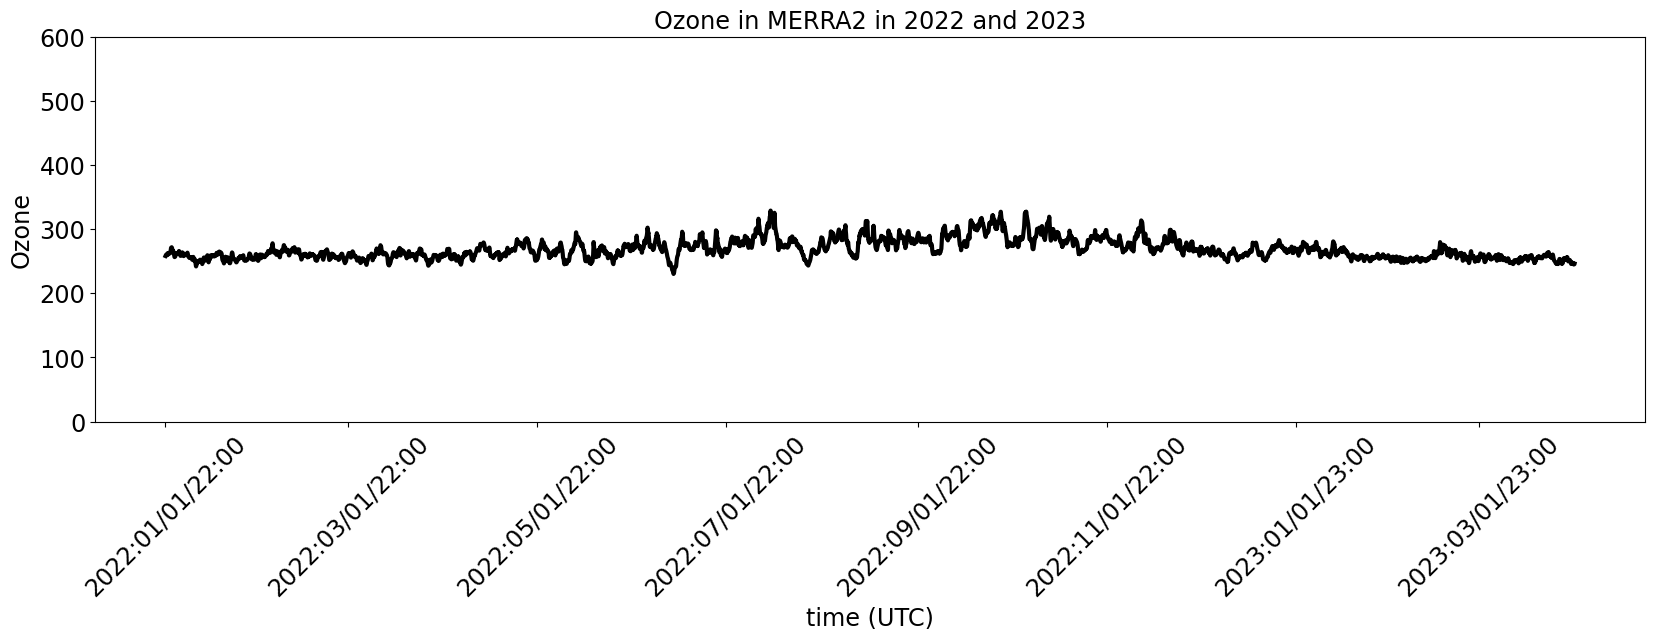

In [11]:
fig=plt.figure(figsize=(20,5))
    
ax=fig.add_subplot(111)
#myFmt = mdates.DateFormatter('%H:%M')
myFmt = mdates.DateFormatter('%Y:%D:%H')
ax.xaxis.set_major_formatter(myFmt)

ax.plot(all_merra2_datetime,oz_merra2 ,'-',color='k',lw=3)
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_tick_params(rotation=45)
ax.set_xlabel("time (UTC)")
ax.set_ylabel("Ozone")
ax.set_title('Ozone in MERRA2 in 2022 and 2023')
ax.set_ylim(0,600)

## Data

In [12]:
DATE="2022 - 2023"
#DATE="2022/03/17 and 2022/06 (29,30)"

In [13]:
FLAG_SELECT_POLAR = True
FLAG_SELECT_REMOVE_BIGSIGMA = True

In [14]:
if FLAG_SELECT_POLAR:
    tag_stars = "HD185975_star"
else:
    tag_stars = "all_stars"

In [15]:
path_out = "dataout/fitparamatm"

In [16]:
filenames = [
"multifitcovparamatm-2022-09-28-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-09-29-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-12-08-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2022-12-09-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-01-17-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-01-18-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-02-28-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-03-01-empty~holo4_003-psf2dffm-polar.csv",
"multifitcovparamatm-2023-03-16-empty~holo4_003-psf2dffm-polar.csv",
]

In [17]:
NDAYS = len(filenames)
tags = [
    "2022/09/28","2022/09/29",
    "2022/12/08","2022/12/09",
    "2023/01/17","2023/01/18",
    "2023/02/28",
    "2023/03/01","2023/03/16"
]

In [18]:
all_df = []
for filename in filenames:
    df = pd.read_csv(os.path.join(path_out,filename), index_col=0)
    df=df.dropna(axis=0)
    
    #cut on chi2
    df = df[df['chi2_1']<400]
    
    if FLAG_SELECT_POLAR:
        df = df[df["spec_target_label"]=='HD185975']
        
    if FLAG_SELECT_REMOVE_BIGSIGMA:
        df =df[df["pwv_sig"]<1]
    all_df.append(df)

In [19]:
df

,index,exposure,spec_date_obs,spec_target_label,spec_filter_label,spec_airmass,spec_pressure,spec_temperature,spec_humidity,spec_hour_angle,...,egrey_3,SNR_3,chi2_4,pwv_4,grey_4,epwv_4,egrey_4,SNR_4,pwv_avg,pwv_sig
0,0,2023031600465,2023-03-17T06:20:56.082001145Z,HD185975,empty,2.034006,0,0,0,-107.983587,...,0.004077,0.090913,26.186849,6.309265,1.000386,0.451908,0.002948,0.163989,5.485352,0.496158
1,1,2023031600466,2023-03-17T06:21:39.074005228Z,HD185975,empty,2.033523,0,0,0,-107.803713,...,0.001320,0.059766,3.779965,6.596235,1.014952,0.186864,0.001206,0.031077,6.241020,0.555942
2,8,2023031600505,2023-03-17T06:52:06.172502735Z,HD185975,empty,2.013025,0,0,0,-100.287611,...,0.003339,0.218959,17.977881,6.132925,1.013341,0.374993,0.002455,0.075281,5.413093,0.475768
3,9,2023031600506,2023-03-17T06:52:49.175495727Z,HD185975,empty,2.012533,0,0,0,-100.107582,...,0.002705,0.003425,11.050183,6.487817,1.011192,0.296783,0.001933,0.088479,5.453372,0.626046
4,16,2023031600544,2023-03-17T07:26:52.619493301Z,HD185975,empty,1.989428,0,0,0,-91.696580,...,0.004178,0.173574,87.636143,5.253455,1.011087,0.765208,0.005233,0.100871,4.109853,0.628623
5,17,2023031600545,2023-03-17T07:27:35.585004713Z,HD185975,empty,1.988936,0,0,0,-91.517218,...,0.003387,0.000556,16.140642,6.265293,1.013693,0.358565,0.002344,0.048332,5.090668,0.726499
6,26,2023031600589,2023-03-17T07:59:53.341001019Z,HD185975,empty,1.967435,0,0,0,-83.628469,...,0.002581,0.046287,11.629380,6.037212,1.015865,0.302178,0.001960,0.024015,5.283627,0.600988
7,27,2023031600590,2023-03-17T08:00:36.347990813Z,HD185975,empty,1.966954,0,0,0,-83.448648,...,0.001948,0.014420,6.401902,6.257694,1.022070,0.226937,0.001473,0.025808,5.582819,0.605181
8,37,2023031600645,2023-03-17T08:43:51.125005011Z,HD185975,empty,1.939320,0,0,0,-72.914176,...,0.003266,0.028791,15.038974,5.641604,1.014928,0.337094,0.002202,0.058981,4.584843,0.619398
9,38,2023031600646,2023-03-17T08:44:34.193006376Z,HD185975,empty,1.938865,0,0,0,-72.734137,...,0.002576,0.049594,10.624450,5.764122,1.016409,0.287014,0.001873,0.059926,4.975795,0.484521


In [20]:
NF =len(all_df)

In [21]:
all_df[0].head()

,index,exposure,spec_date_obs,spec_target_label,spec_filter_label,spec_airmass,spec_pressure,spec_temperature,spec_humidity,spec_hour_angle,...,egrey_3,SNR_3,chi2_4,pwv_4,grey_4,epwv_4,egrey_4,SNR_4,pwv_avg,pwv_sig
2,20,2022092800469,2022-09-29T03:24:22.341002192Z,HD185975,empty,1.865924,0,0,0,-319.739723,...,0.002900,0.059028,16.904583,7.041975,1.025375,0.377098,0.002262,0.060654,5.418314,0.958092
3,21,2022092800470,2022-09-29T03:25:05.327496966Z,HD185975,empty,1.866183,0,0,0,-319.556360,...,0.002779,0.193537,21.574229,6.782923,1.013769,0.415315,0.002528,0.055422,5.321925,0.916966
4,36,2022092800568,2022-09-29T04:38:23.799991948Z,HD185975,empty,1.899071,0,0,0,-300.869912,...,0.001462,0.063070,5.230787,7.273324,1.031517,0.219273,0.001341,0.001260,6.209648,0.836178
5,37,2022092800569,2022-09-29T04:39:06.609505316Z,HD185975,empty,1.899431,0,0,0,-300.691076,...,0.002778,0.121342,16.451951,7.157404,1.022924,0.376610,0.002277,0.017676,6.256612,0.493589
6,40,2022092800591,2022-09-29T04:53:33.118002418Z,HD185975,empty,1.907080,0,0,0,-297.004658,...,0.003438,0.110994,29.719152,6.738912,1.011864,0.503671,0.003081,0.086214,5.930345,0.416290


In [22]:
hls_colors = sns.color_palette("hls", NF)

## Airmass

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_47389/1147230304.py:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,airmasses,'r:o',color=hls_colors[idx],lw=3)


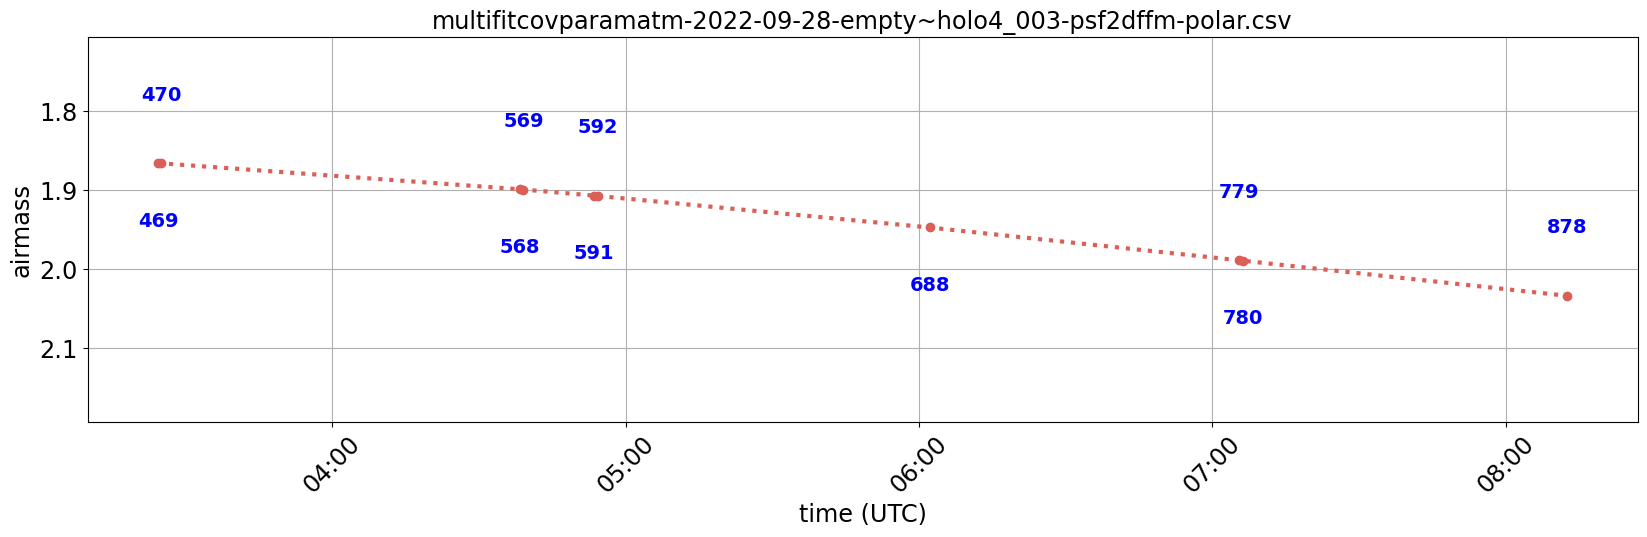

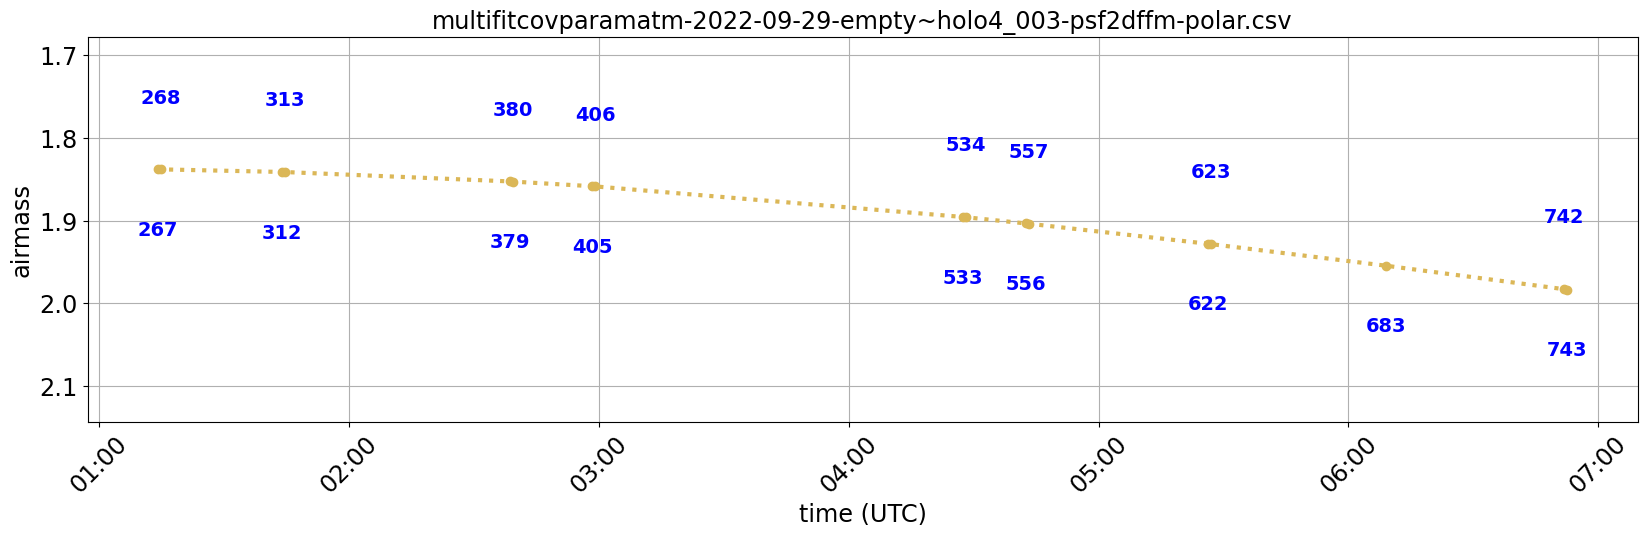

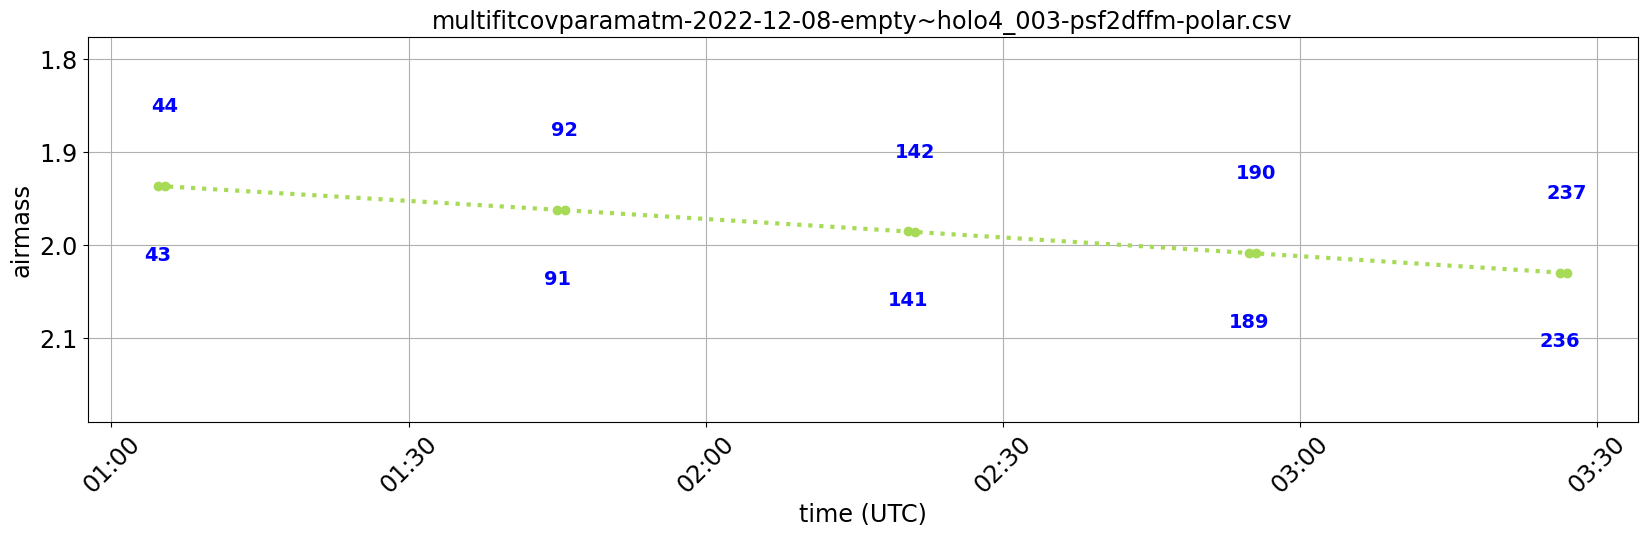

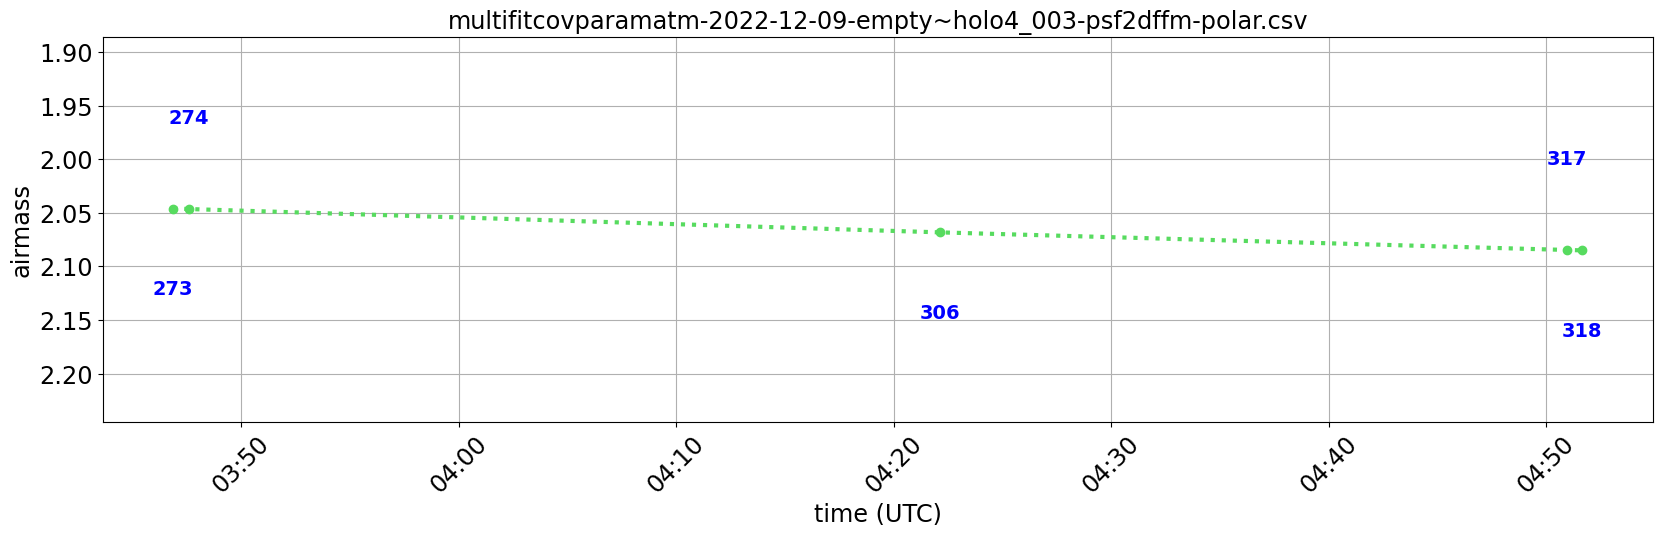

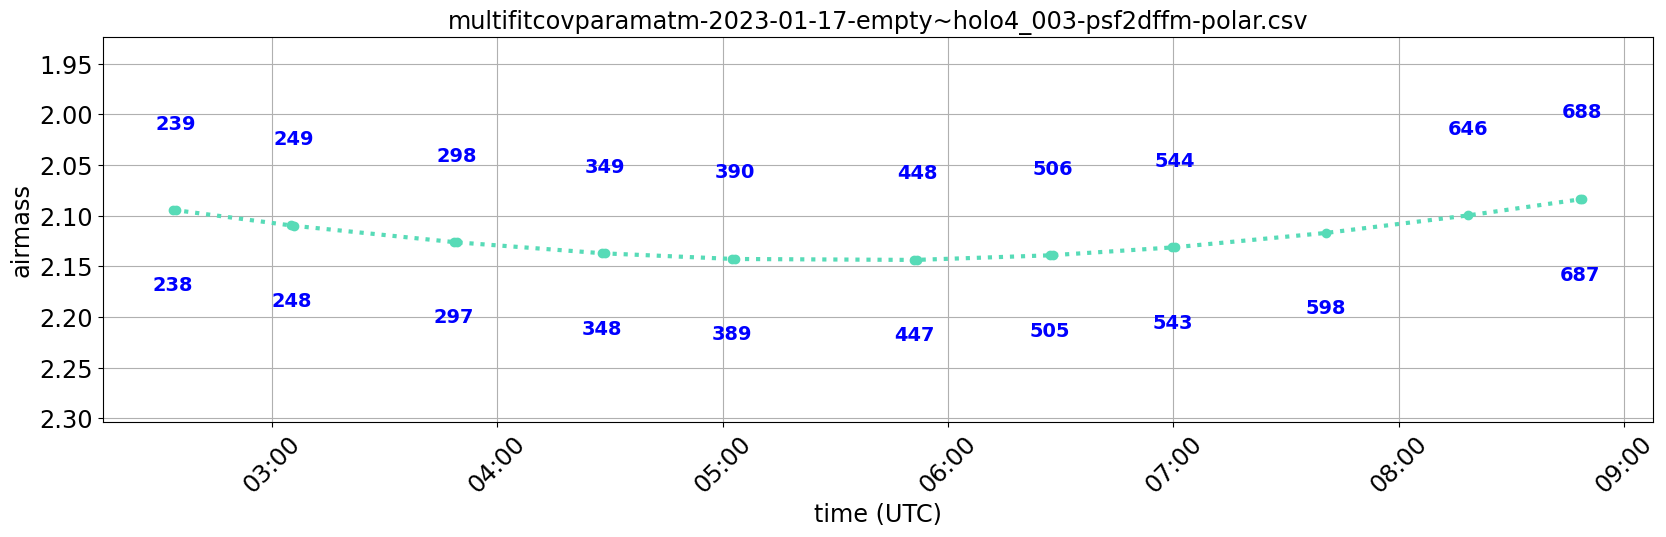

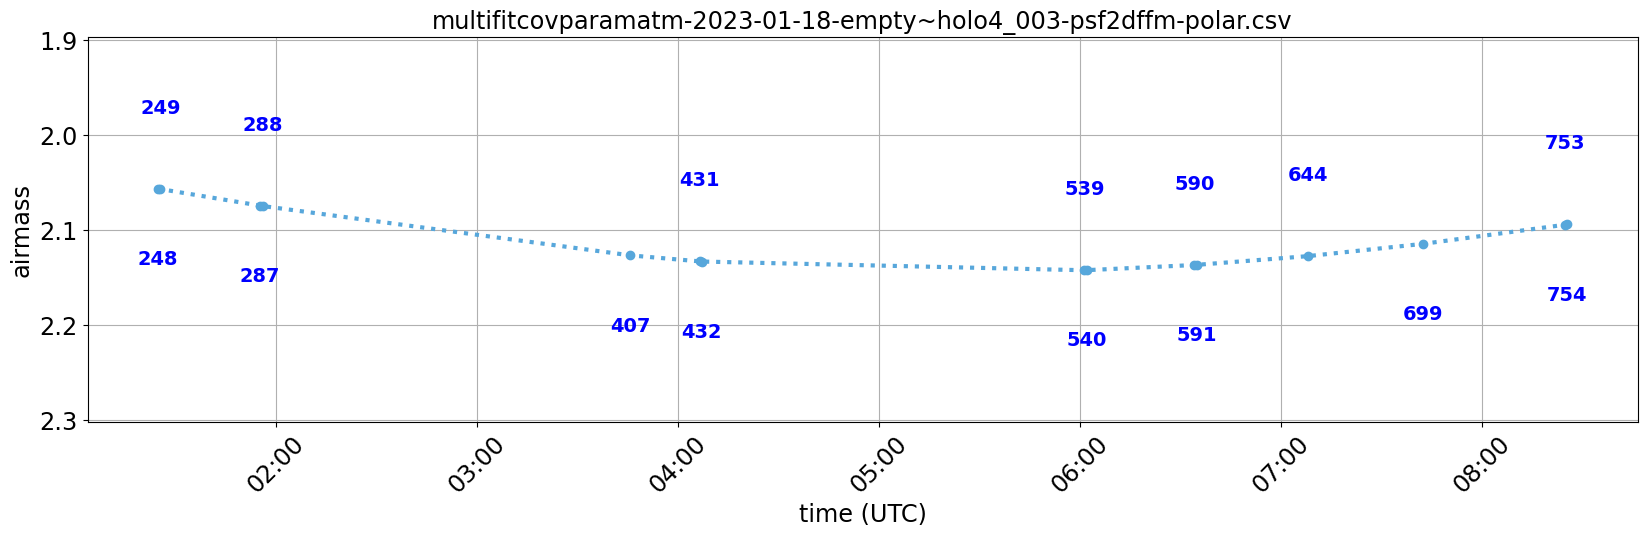

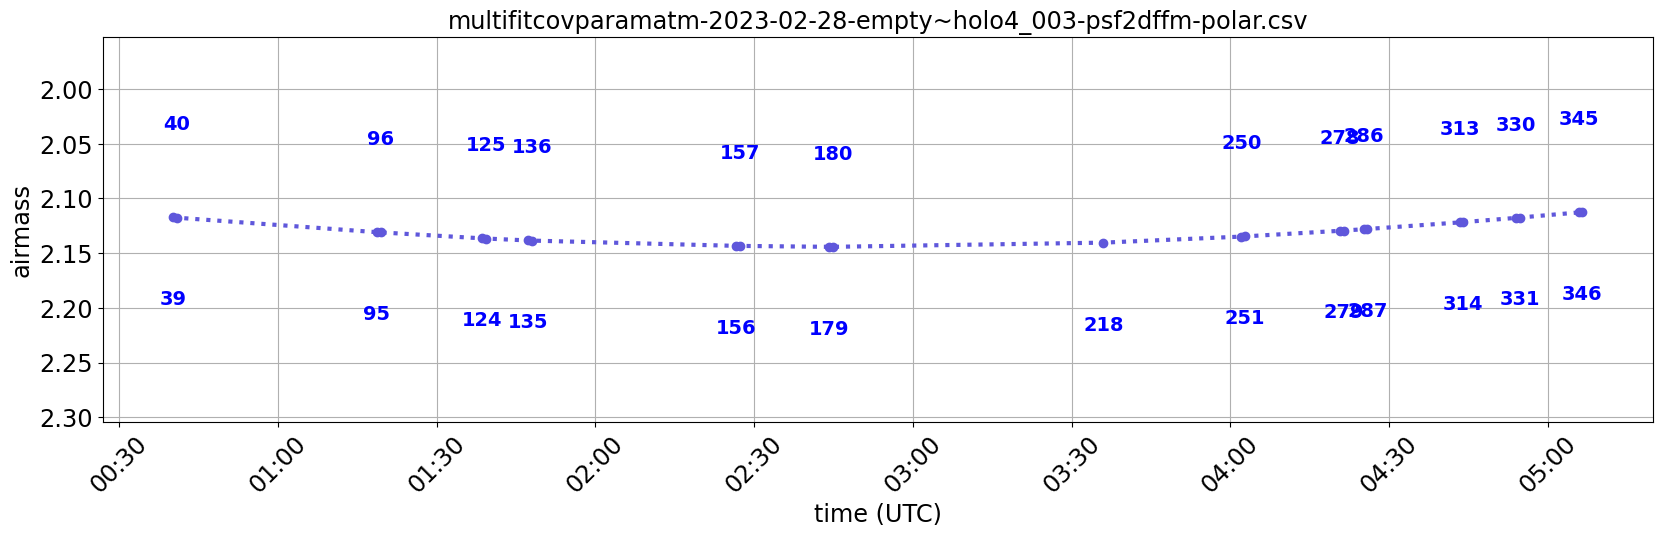

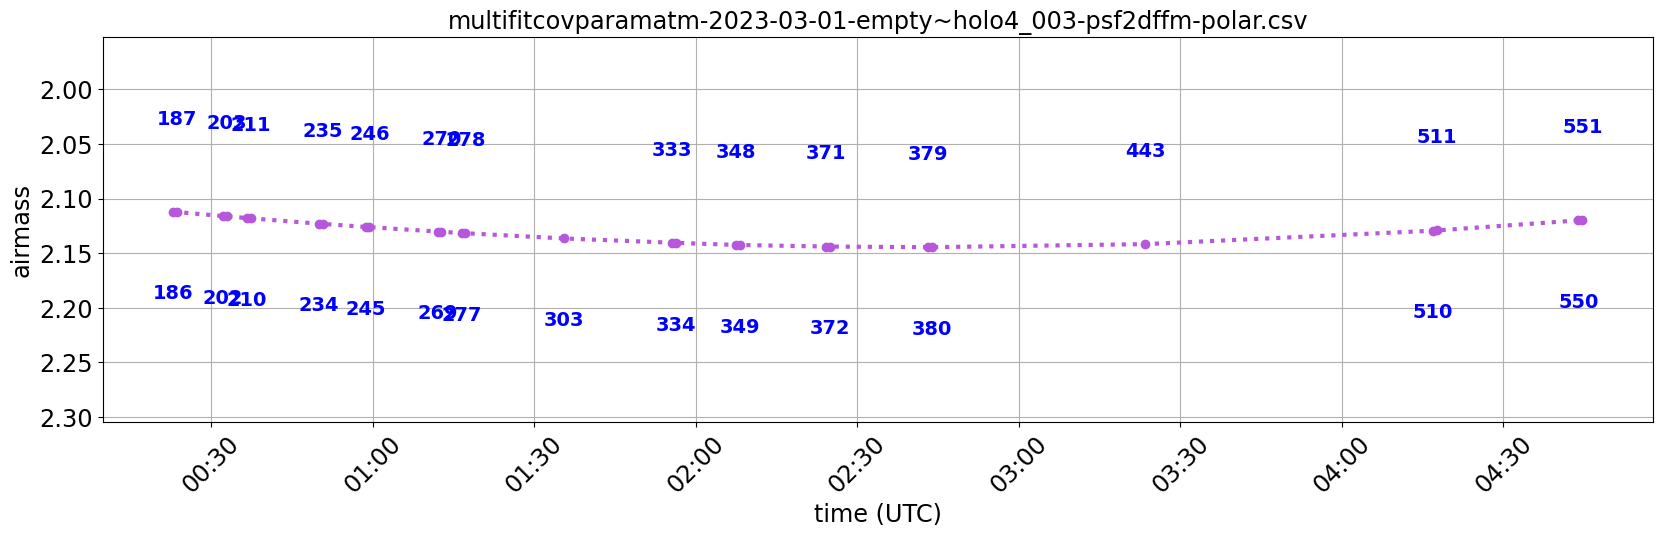

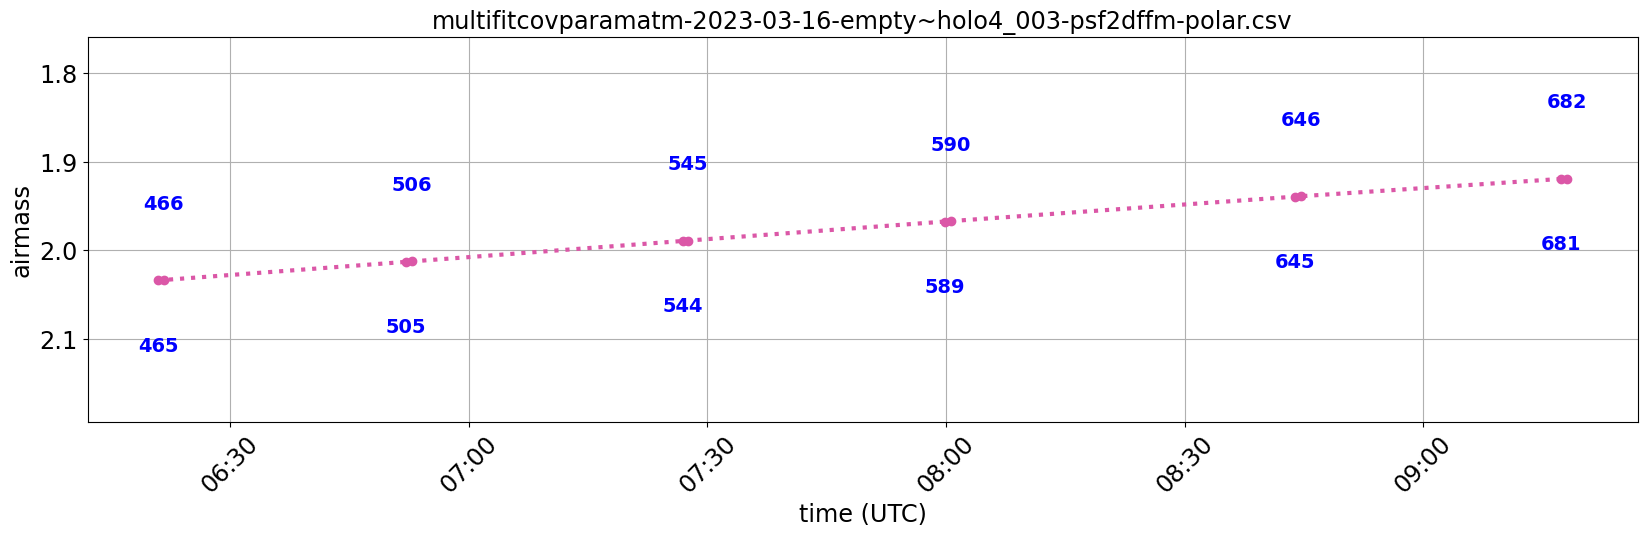

In [23]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    numbers = infos['number'].values
    airmasses = infos['spec_airmass'].values
    
    N= len(numbers)
    
    if N>0:
  
        # Create rectangle x coordinates
        startTime = all_datetime[0]
        endTime =  all_datetime[-1]

        # convert to matplotlib date representation
        start = mdates.date2num(startTime)
        end = mdates.date2num(endTime)
        width = end - start


        fig=plt.figure(figsize=(20,5))
    
        ax=fig.add_subplot(111)
        myFmt = mdates.DateFormatter('%H:%M')
        ax.xaxis.set_major_formatter(myFmt)

    

        y_shift= 0.08

  
        ax.plot(all_datetime,airmasses,'r:o',color=hls_colors[idx],lw=3)
        ax.xaxis.set_major_formatter(myFmt)
        ax.xaxis.set_tick_params(rotation=45)
        ax.set_xlabel("time (UTC)")
        ax.set_ylabel("airmass")
        ax.set_ylim(airmasses.min()-2*y_shift,airmasses.max()+2*y_shift)
        # Plot rectangle
        #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
        #ax2.add_patch(rect)   
        ax.invert_yaxis()
        ax.grid()


        for index in range(N):
            textstr= str(numbers[index])
            if index%2 == 0:
                dy = y_shift
            else:
                dy = -y_shift
            
            ax.text(all_datetime[index], airmasses[index] + dy , textstr,fontsize=14,fontweight="bold",ha='center',color="b" )
    
        ax.set_title(filenames[idx])
    
    plt.show()
    
    

# Function to find pairs

In [24]:
def FindPairs(df):
    all_datetime = [ Time(str_time).to_datetime() for str_time in df['spec_date_obs'] ]
    nn=len(all_datetime)
    difftimes = [ (all_datetime[n+1]-all_datetime[n]).seconds for n in range(nn-1) ]
    print(difftimes)
    all_pairs = []
    
    for idx,difft in   enumerate(difftimes):
        if difft<60:
            all_pairs.append(idx)
    return all_pairs

## Precipitable water vapor

### Plot all PWV in different figures

In [25]:
hls_colors = sns.color_palette("hls", NF)

In [56]:
df.columns

Index(['index', 'exposure', 'spec_date_obs', 'spec_target_label',
       'spec_filter_label', 'spec_airmass', 'spec_pressure',
       'spec_temperature', 'spec_humidity', 'spec_hour_angle',
       'spec_parallactic_angle', 'spec_camera_angle', 'spec_order',
       'spec_header_target', 'spec_header_redshift', 'spec_header_grating',
       'spec_header_rotangle', 'spec_header_d2ccd', 'spec_header_lshift',
       'spec_header_parangle', 'spec_header_targetx', 'spec_header_targety',
       'spec_header_lbda_ref', 'spec_header_pixshift', 'spec_header_psf_reg',
       'spec_header_trace_r', 'spec_header_chi2_fit', 'spec_header_a2_fit',
       'spec_header_am_fit', 'spec_header_meanfwhm', 'spec_header_version',
       'spec_header_rebin', 'spec_header_date-obs', 'spec_header_exptime',
       'spec_header_airmass', 'spec_header_dec', 'spec_header_ha',
       'spec_header_outtemp', 'spec_header_outpress', 'spec_header_outhum',
       'spec_header_filter', 'spec_header_cam_rot', 'spec_header_s_

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_47389/387850386.py:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel")


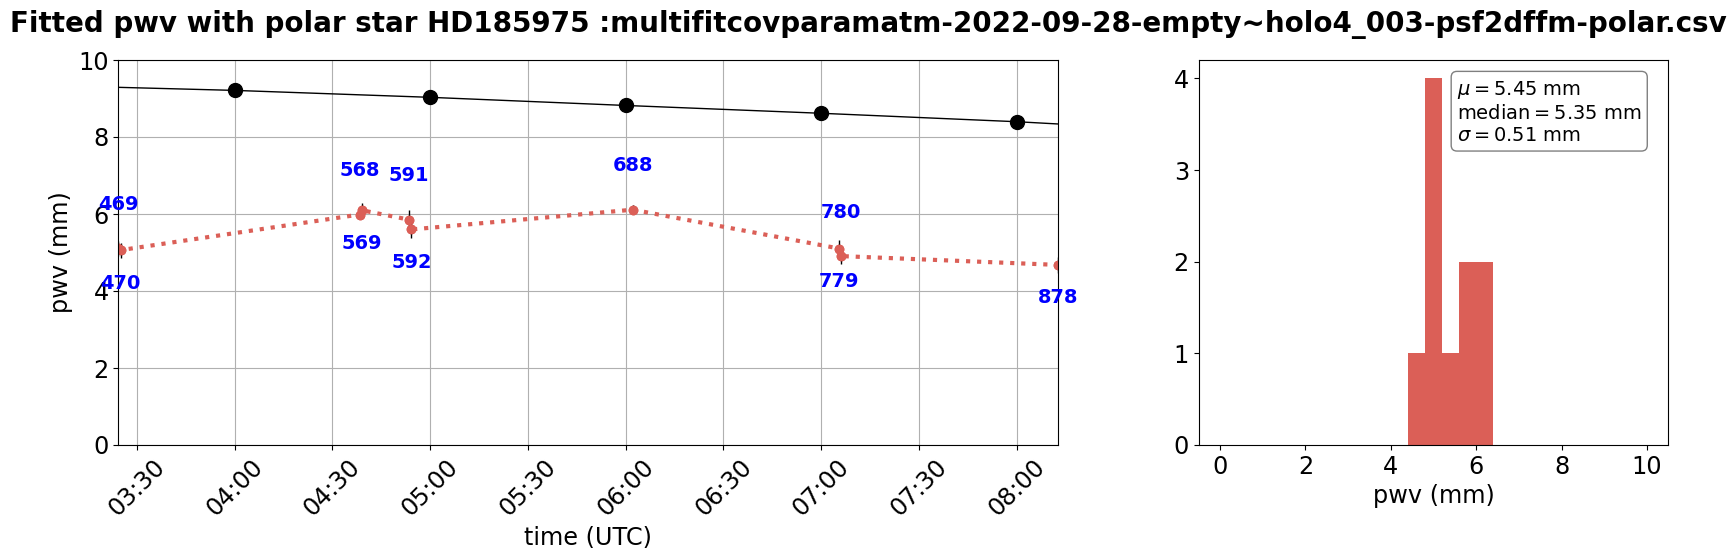

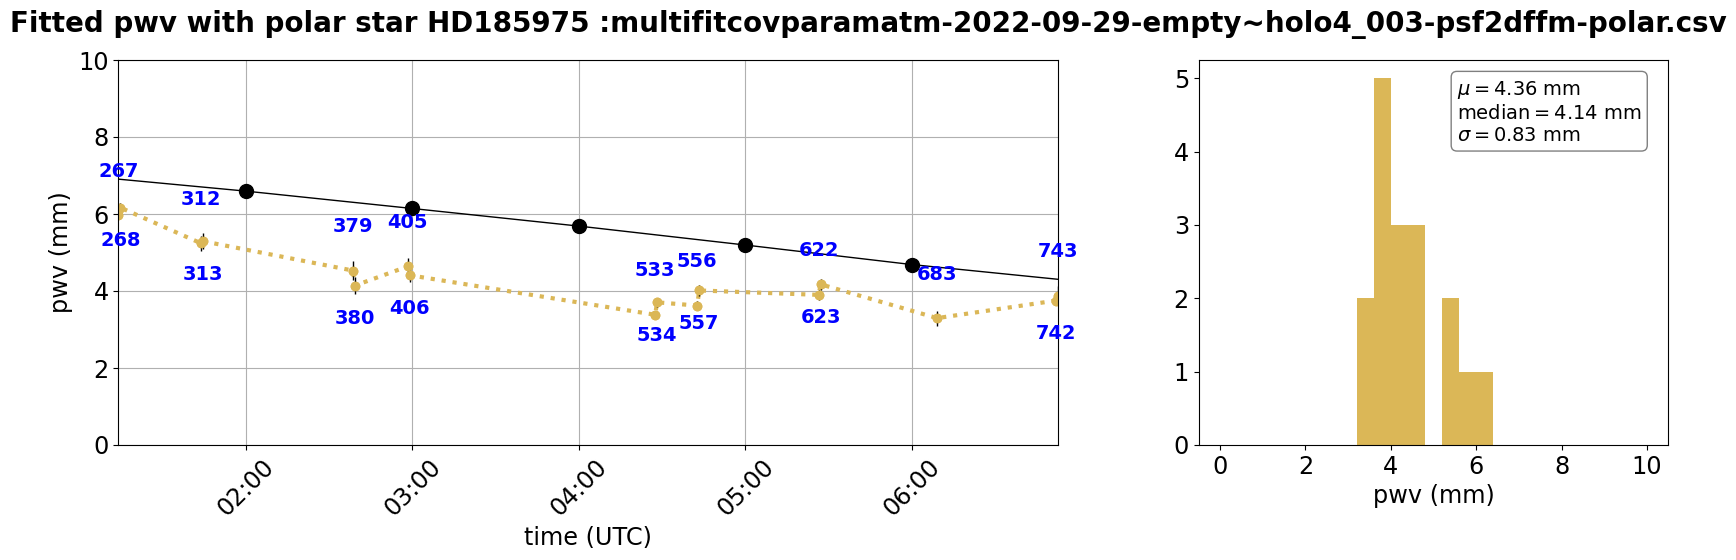

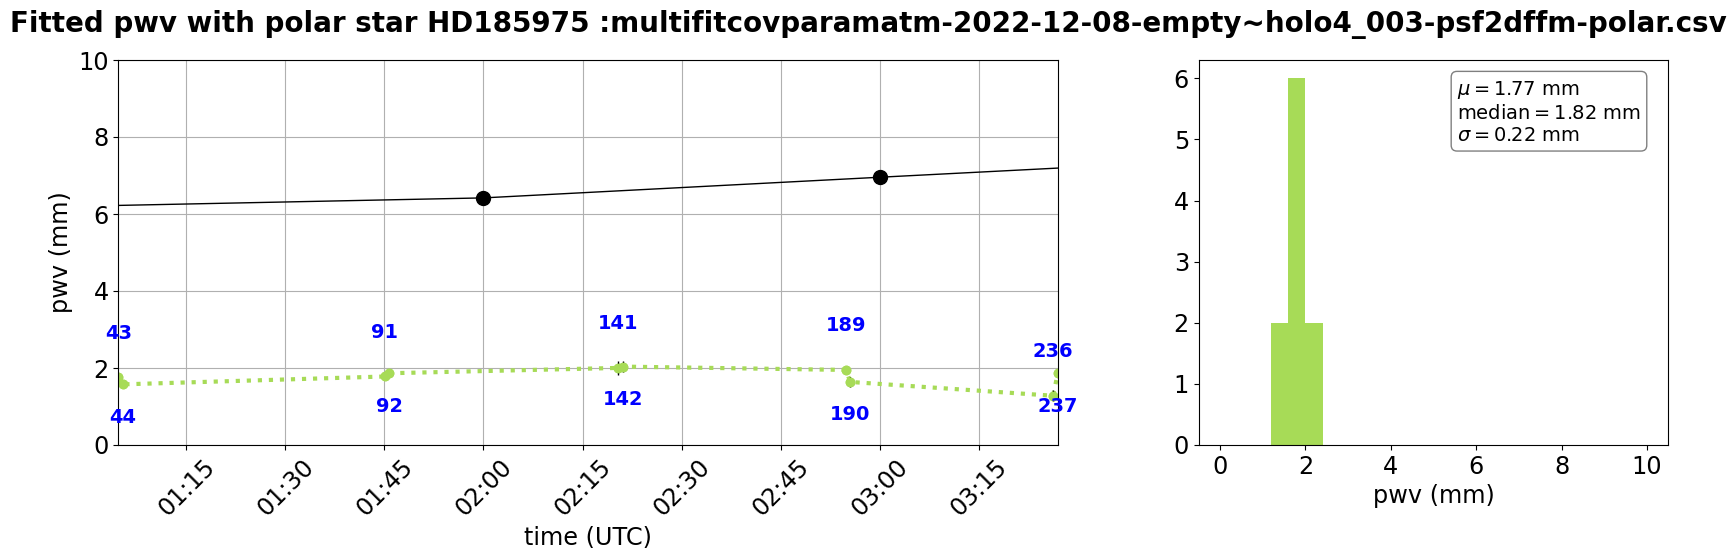

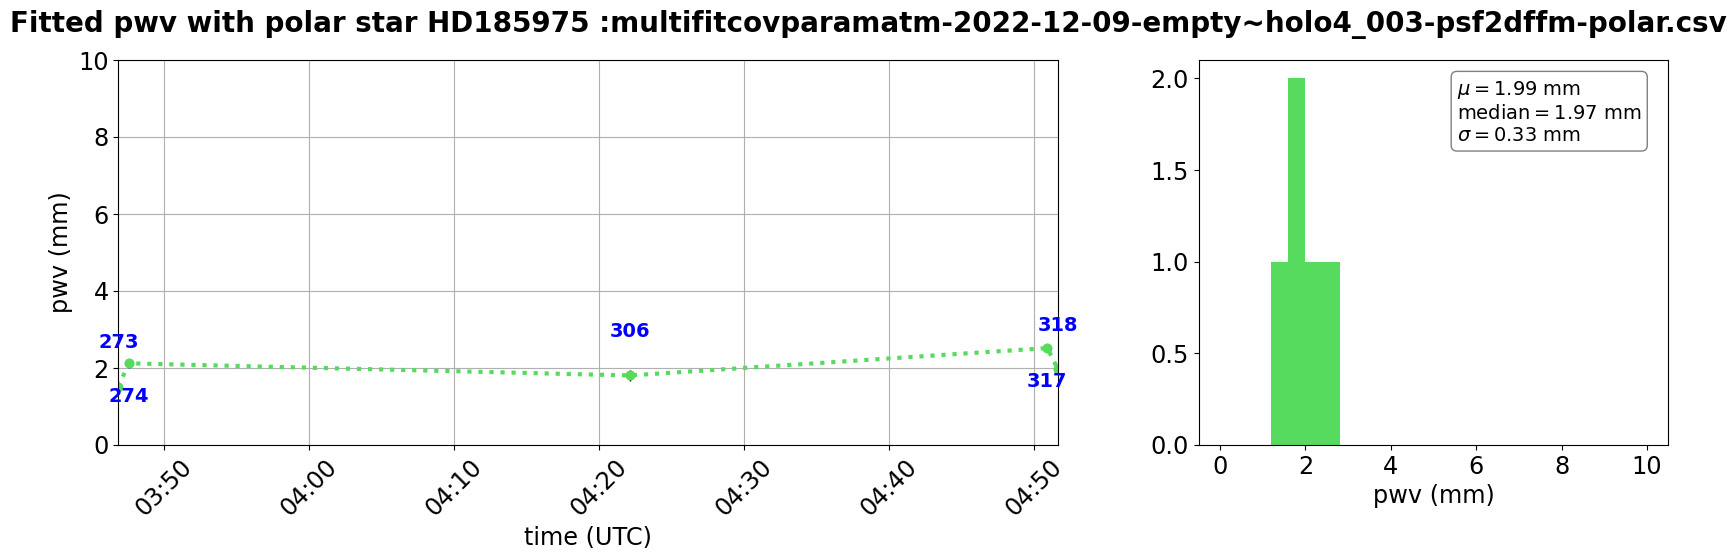

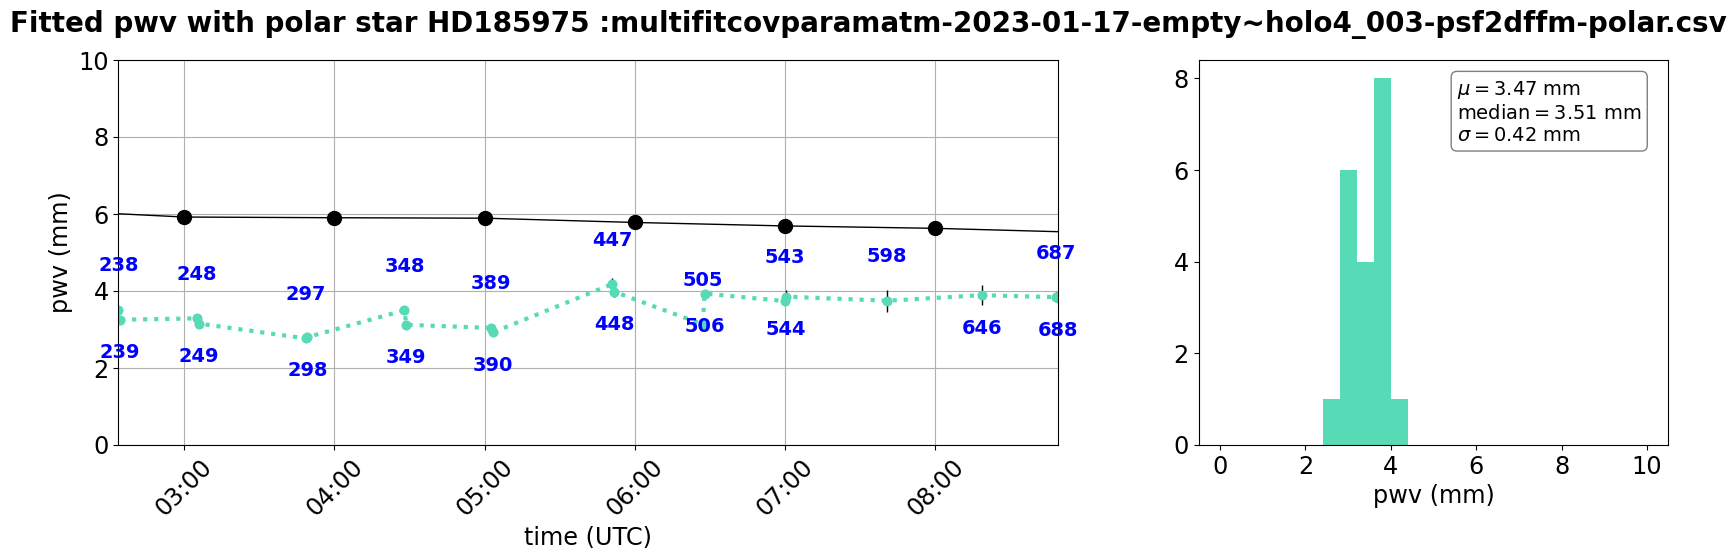

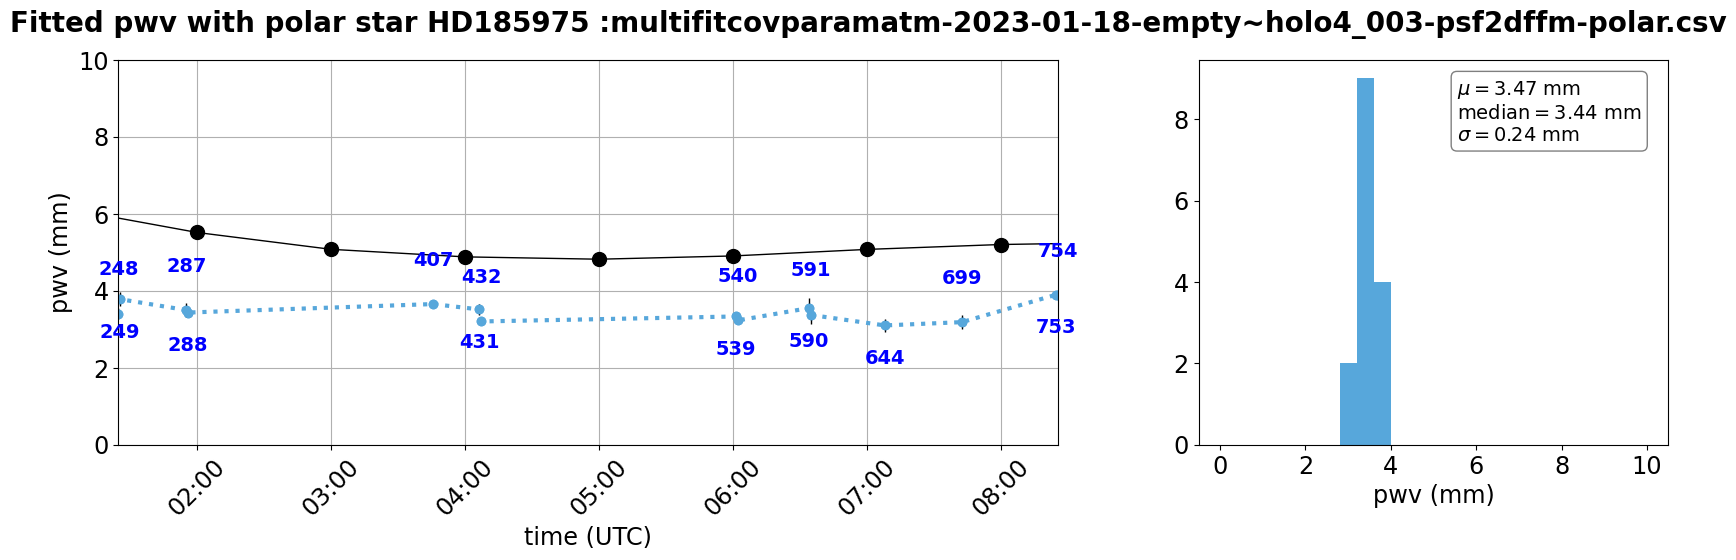

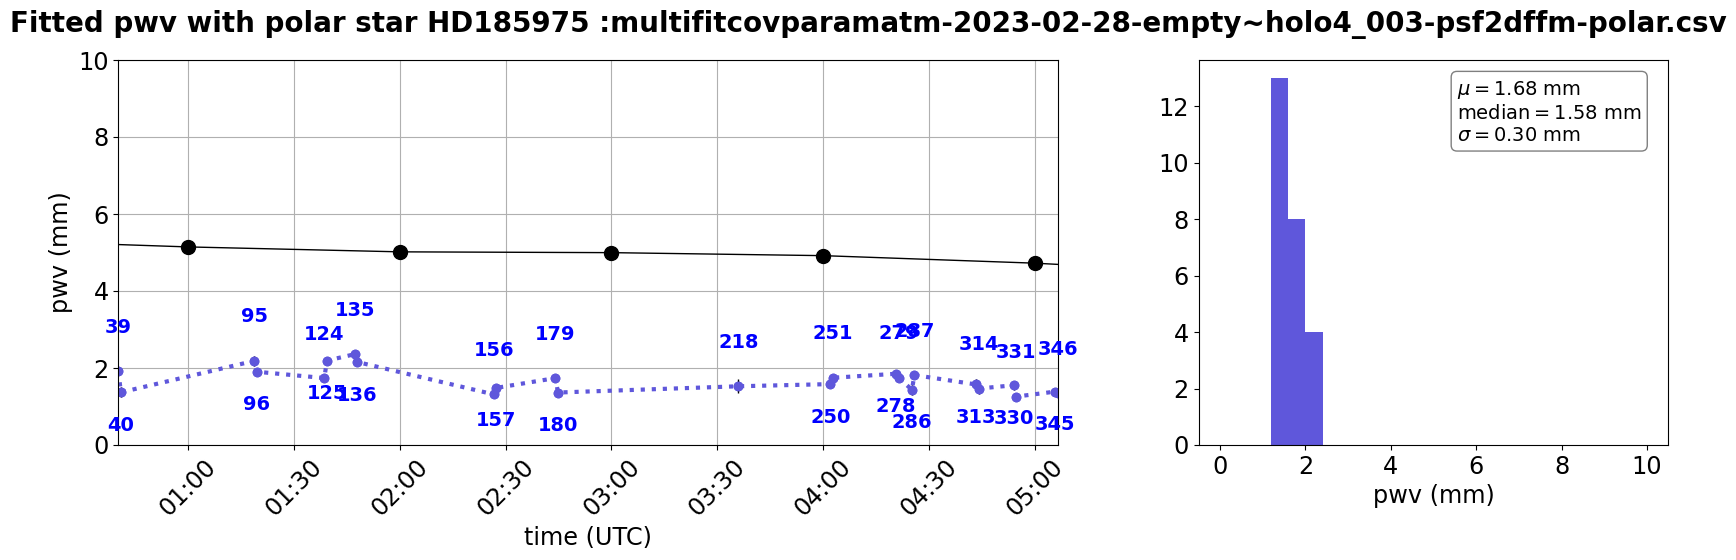

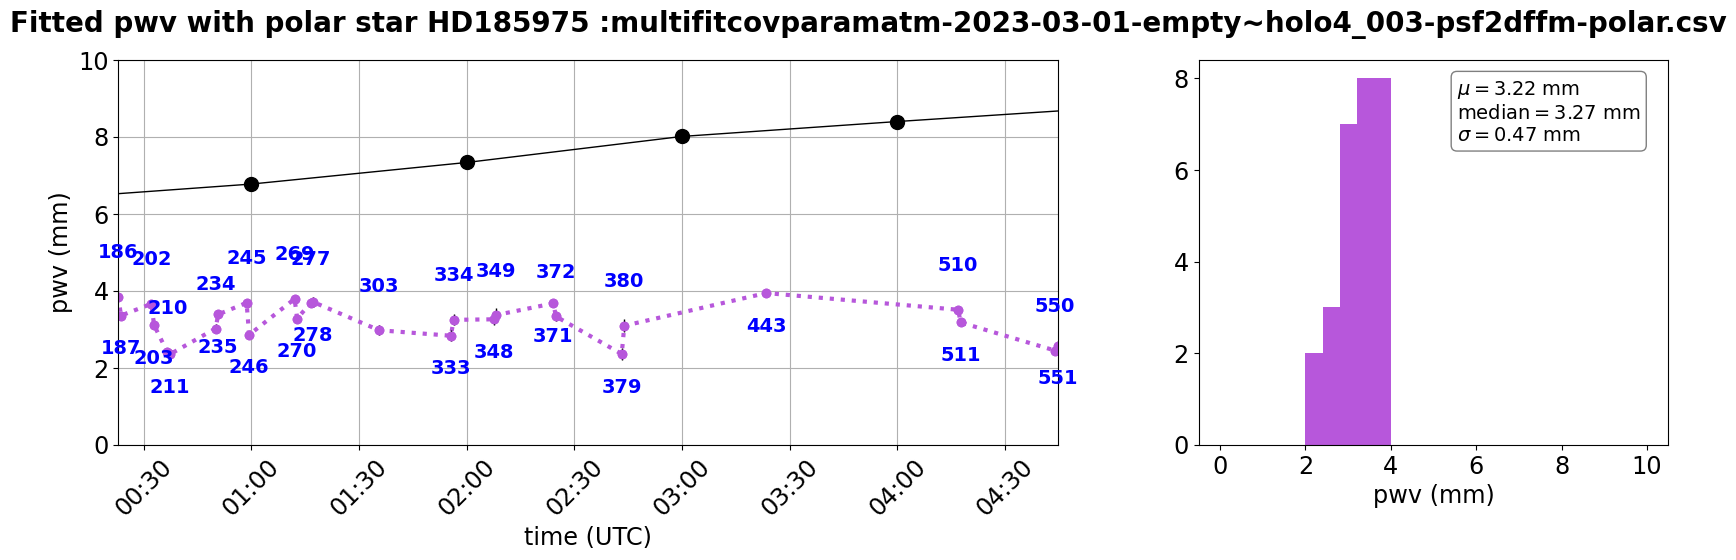

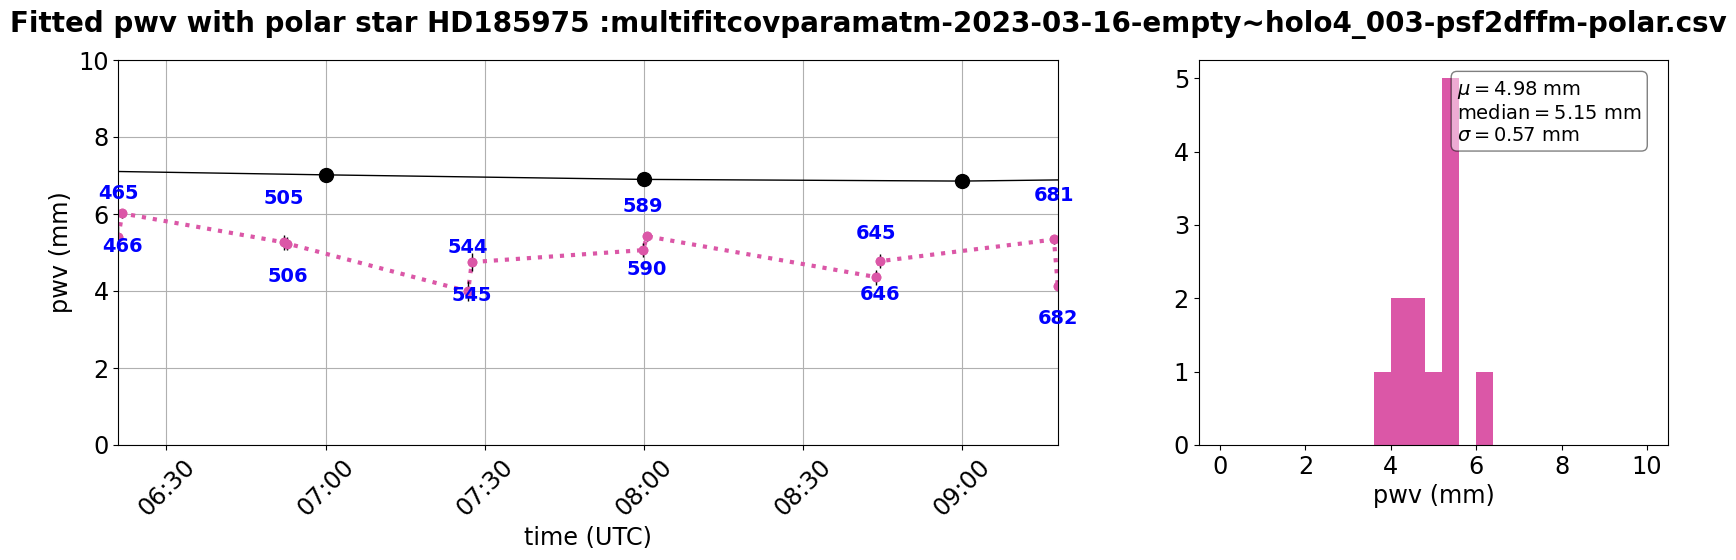

In [57]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    numbers = infos['number'].values
    
    #pwv= infos['pwv_avg'].values
    #epwv= infos['pwv_sig'].values
    
    pwv= infos['pwv_1'].values
    epwv= infos['epwv_1'].values
    

    N= len(numbers)
    if N<1:
        continue
  
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    fig=plt.figure(figsize=(20,5))
    gs = gridspec.GridSpec(1, 2,width_ratios=[3,1.5],figure=fig)
    
    ax= fig.add_subplot(gs[0,0])
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 

    y_shift= 1

  
    ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel")
    ax.errorbar(all_datetime,pwv,yerr=epwv,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1,label="merra2")
    
    ax.plot(all_merra2_datetime,pwv_merra2 ,'k-o',markersize=10,lw=1,label="RERRA2(2022)")
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("pwv (mm)")
    ax.set_ylim(pwv.min()-2*y_shift,pwv.max()+2*y_shift)
    ax.set_xlim(start,end)
    # Plot rectangle
    #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
    #ax2.add_patch(rect)   
    #ax.invert_yaxis()
    ax.grid()
    ax.set_ylim(0.,10.)


    for index in range(N):
        textstr= str(numbers[index])
        
        if index%2 == 0:
            dy = y_shift
        else:
            dy = -y_shift
            
        ax.text(all_datetime[index], pwv[index] + dy , textstr,fontsize=14,fontweight="bold",ha='center',color="b" )
    
    
    
    ax= fig.add_subplot(gs[0,1])
    ax.hist(pwv,bins=25,range=(0,10),facecolor=hls_colors[idx])
    ax.set_xlabel("pwv (mm)")
    
    mu = pwv.mean()
    median = np.median(pwv)
    sigma =pwv.std()
    
    textstr = '\n'.join((
    r'$\mu=%.2f$ mm' % (mu, ),
    r'$\mathrm{median}=%.2f$ mm' % (median, ),
    r'$\sigma=%.2f$ mm' % (sigma, )))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

    
    
    
    if FLAG_SELECT_POLAR:
        the_title = "Fitted pwv with polar star HD185975 :" + filenames[idx]
    else:
        the_title = "Fitted pwv with all stars :" + filenames[idx]
    plt.suptitle(the_title,fontsize="20",fontweight="bold")
    plt.show()
    
    

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_47389/3019344616.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])


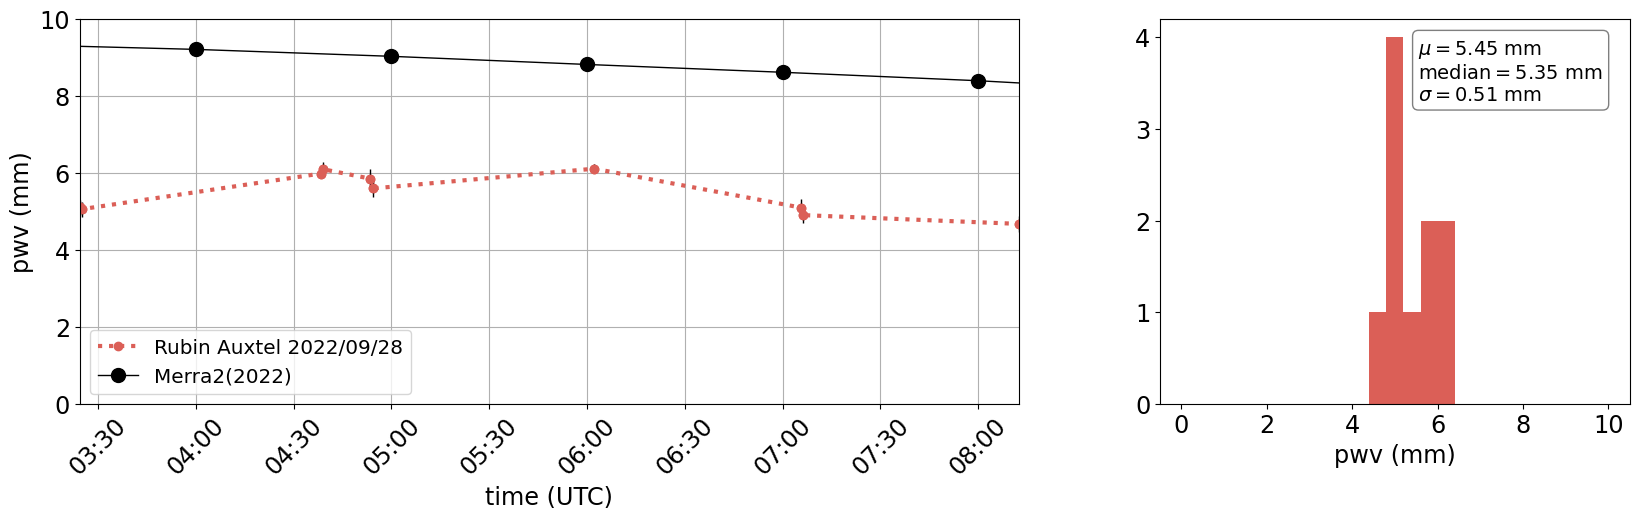

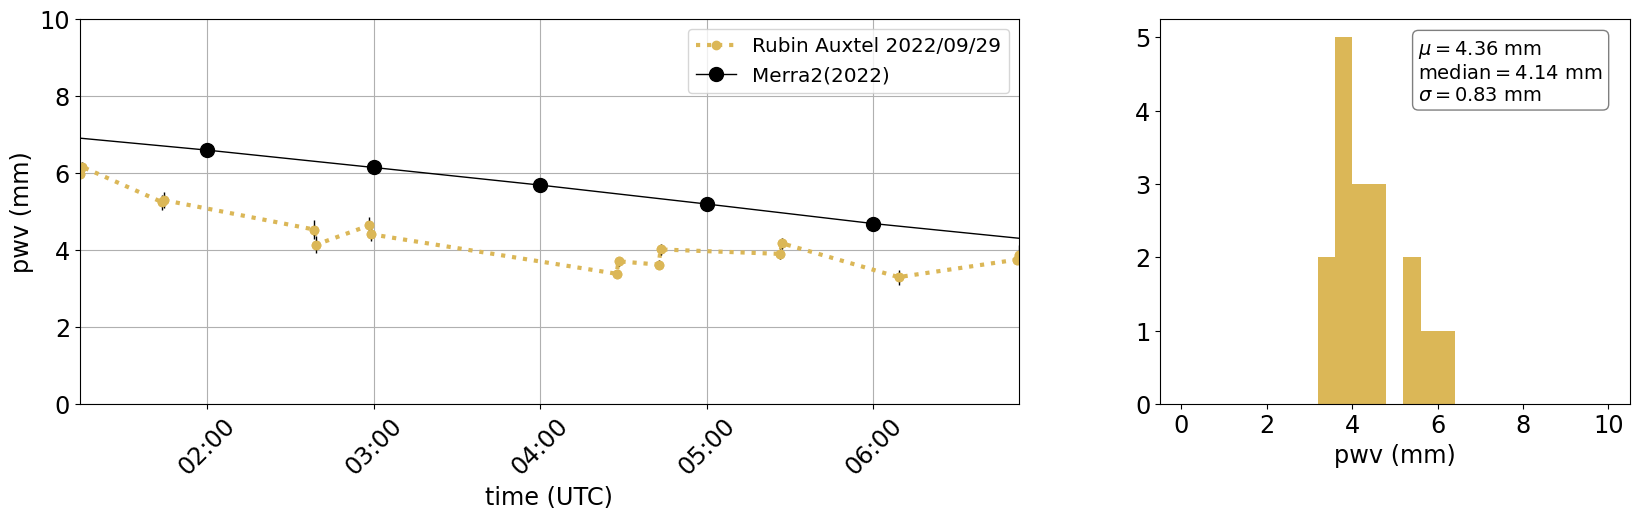

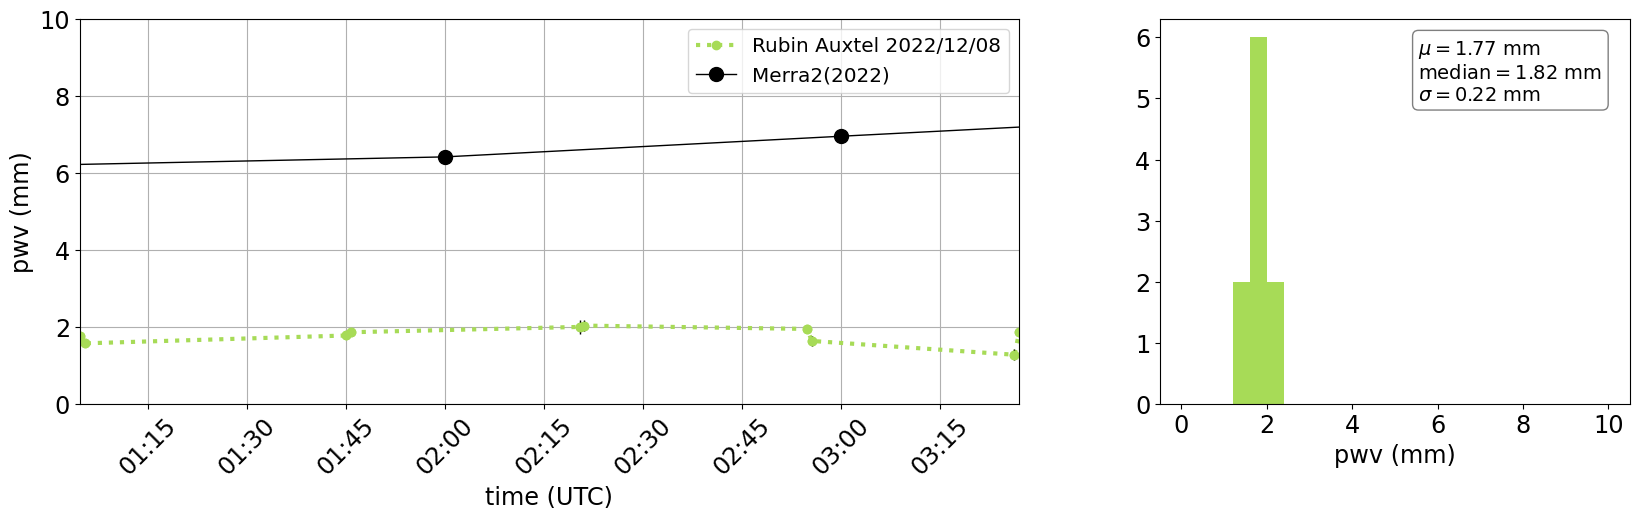

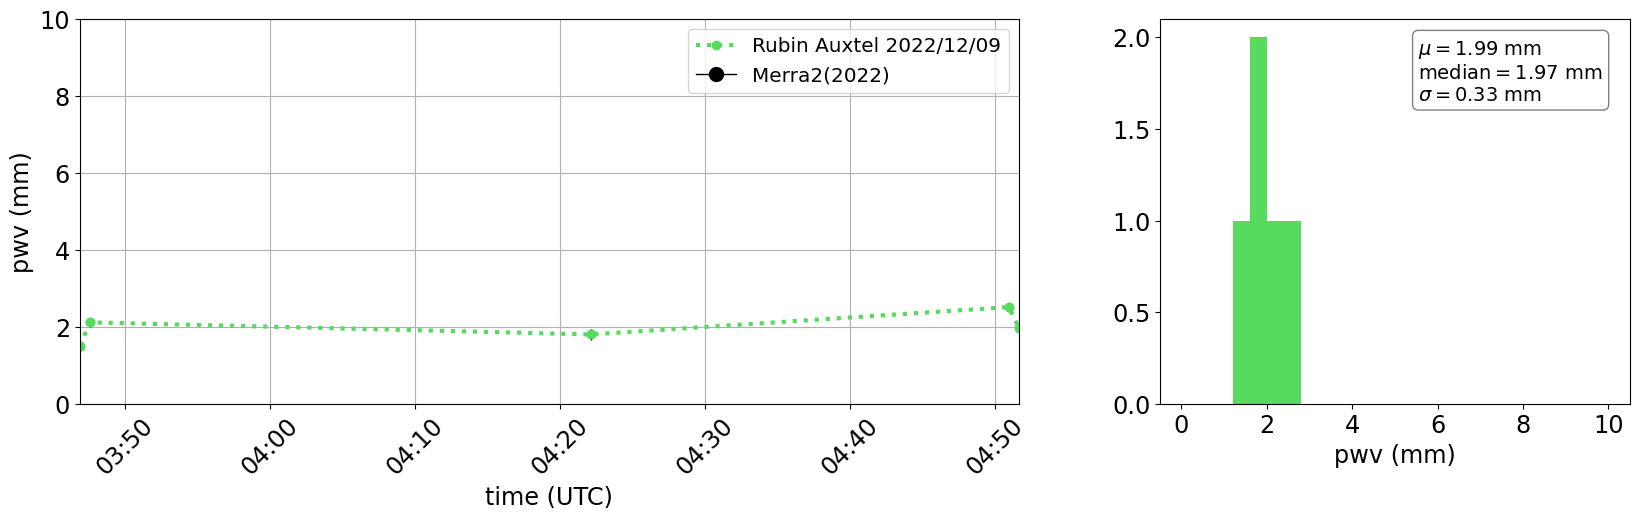

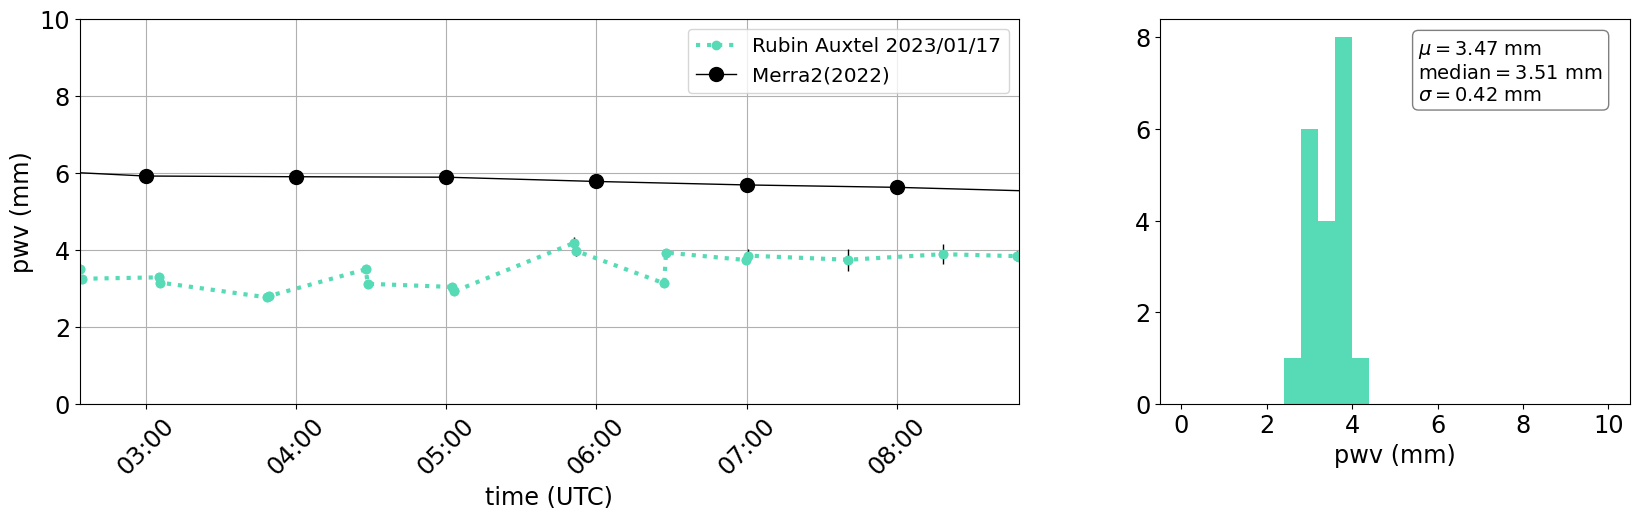

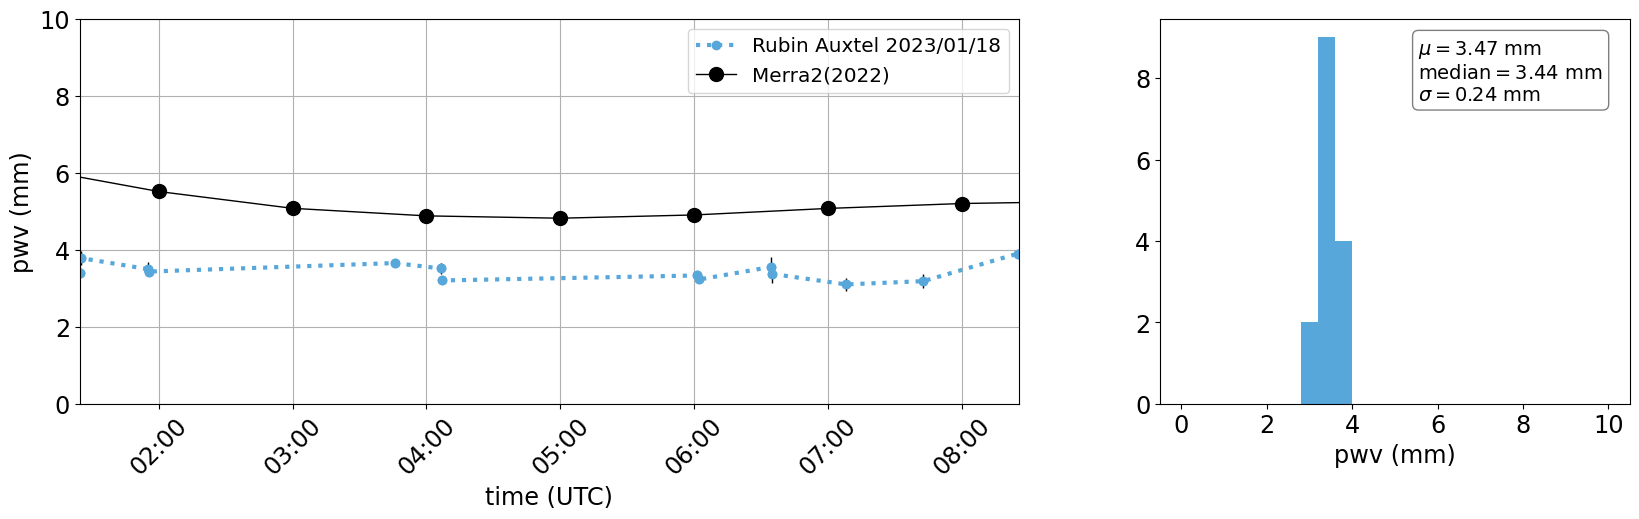

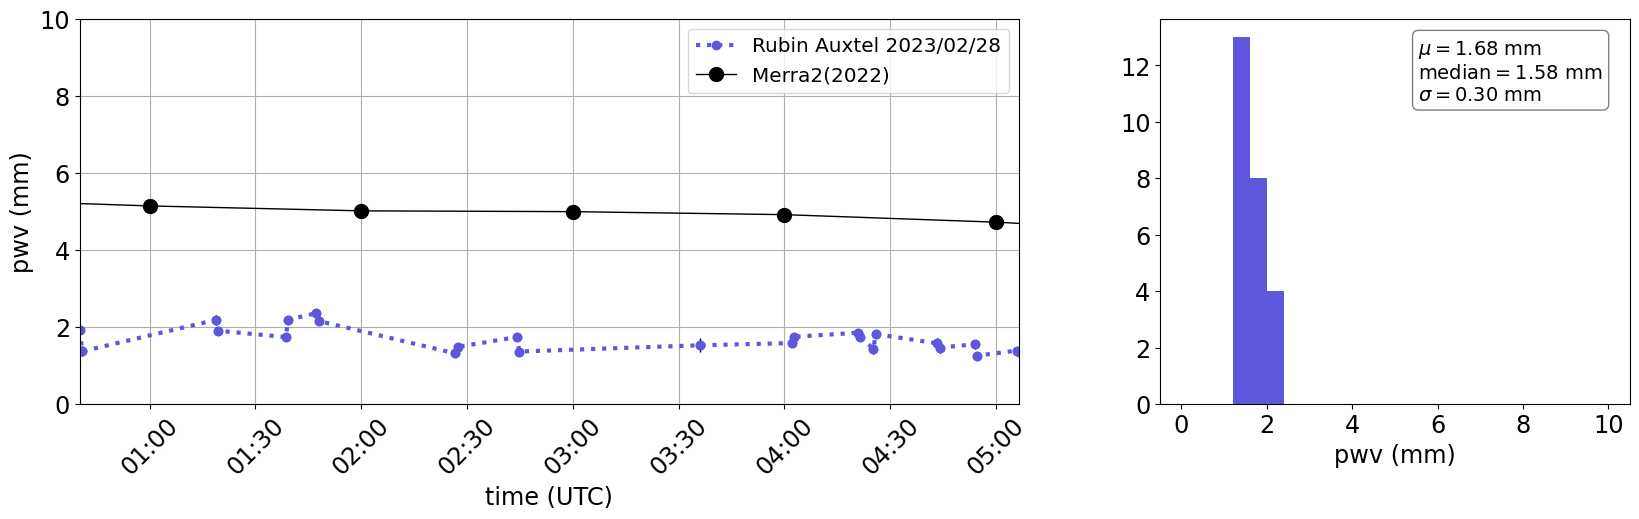

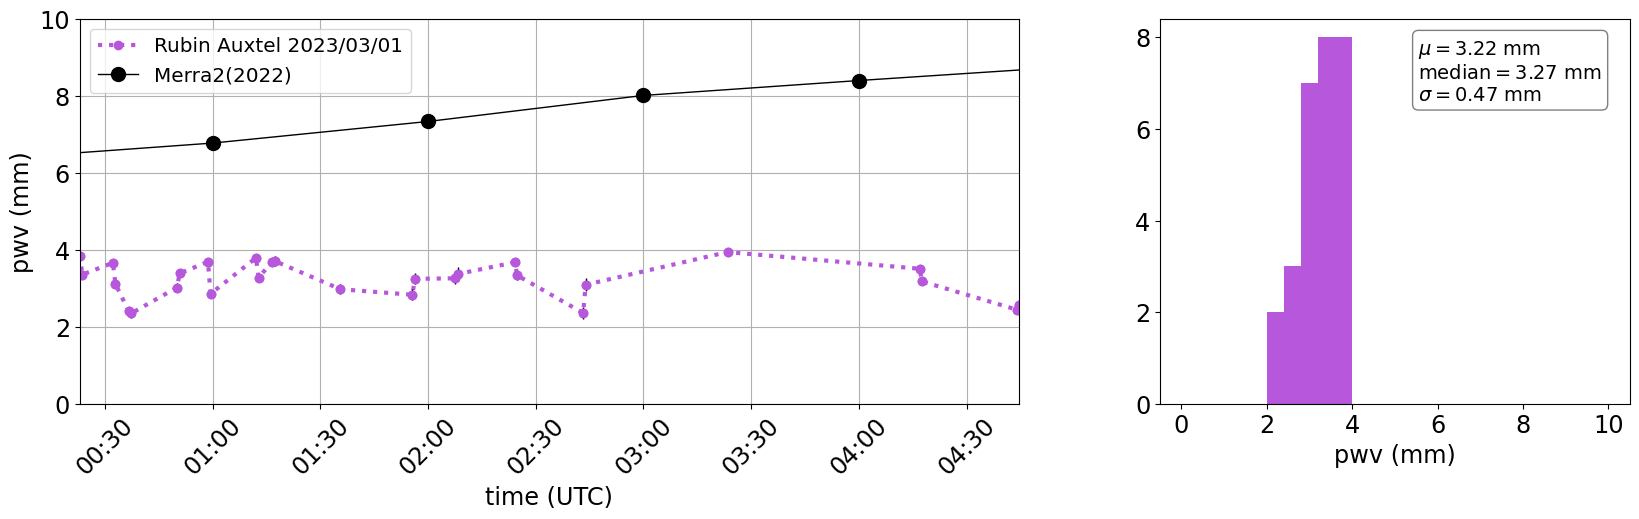

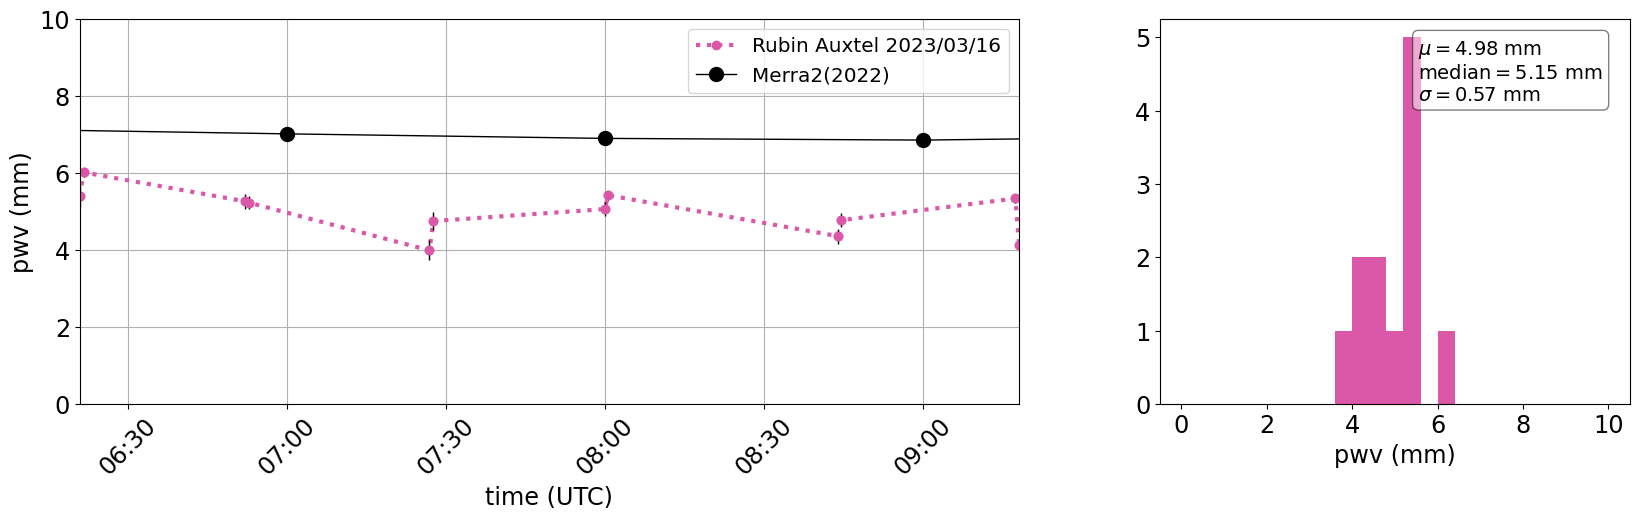

In [59]:
for idx,infos in enumerate(all_df):
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    numbers = infos['number'].values
    
    #pwv= infos['pwv_avg'].values
    #epwv= infos['pwv_sig'].values
    
    
    pwv= infos['pwv_1'].values
    epwv= infos['epwv_1'].values
    

    N= len(numbers)
    if N<1:
        continue
  
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start



    fig=plt.figure(figsize=(20,5))
    gs = gridspec.GridSpec(1, 2,width_ratios=[3,1.5],figure=fig)
    
    ax= fig.add_subplot(gs[0,0])
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 



  
    ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])
    ax.errorbar(all_datetime,pwv,yerr=epwv,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1)
    
    ax.plot(all_merra2_datetime,pwv_merra2 ,'k-o',markersize=10,lw=1,label="Merra2(2022)")
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("pwv (mm)")
    ax.legend()

    ax.set_xlim(start,end)
    # Plot rectangle
    #rect = plt.Rectangle((start, airmasses.min()-2*y_shift), width, airmasses.max()+ 2*y_shift, color='grey',alpha=0.3)
    #ax2.add_patch(rect)   
    #ax.invert_yaxis()
    ax.grid()
    ax.set_ylim(0.,10.)


    
    
    
    ax= fig.add_subplot(gs[0,1])
    ax.hist(pwv,bins=25,range=(0,10),facecolor=hls_colors[idx])
    ax.set_xlabel("pwv (mm)")
    
    mu = pwv.mean()
    median = np.median(pwv)
    sigma =pwv.std()
    
    textstr = '\n'.join((
    r'$\mu=%.2f$ mm' % (mu, ),
    r'$\mathrm{median}=%.2f$ mm' % (median, ),
    r'$\sigma=%.2f$ mm' % (sigma, )))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

    
    
    
    if FLAG_SELECT_POLAR:
        the_title = "Fitted pwv with polar star HD185975 : " + tags[idx]
    else:
        the_title = "Fitted pwv with all stars : " + tags[idx]
    #plt.suptitle(the_title,fontsize="20",fontweight="bold")
    plt.show()
    
    

In [28]:
len(all_df)

9

/var/folders/m7/6pm3rhtj0c71ls7jj9mn1g740000gp/T/ipykernel_47389/1940906358.py:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r:o" (-> color='r'). The keyword argument will take precedence.
  ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])


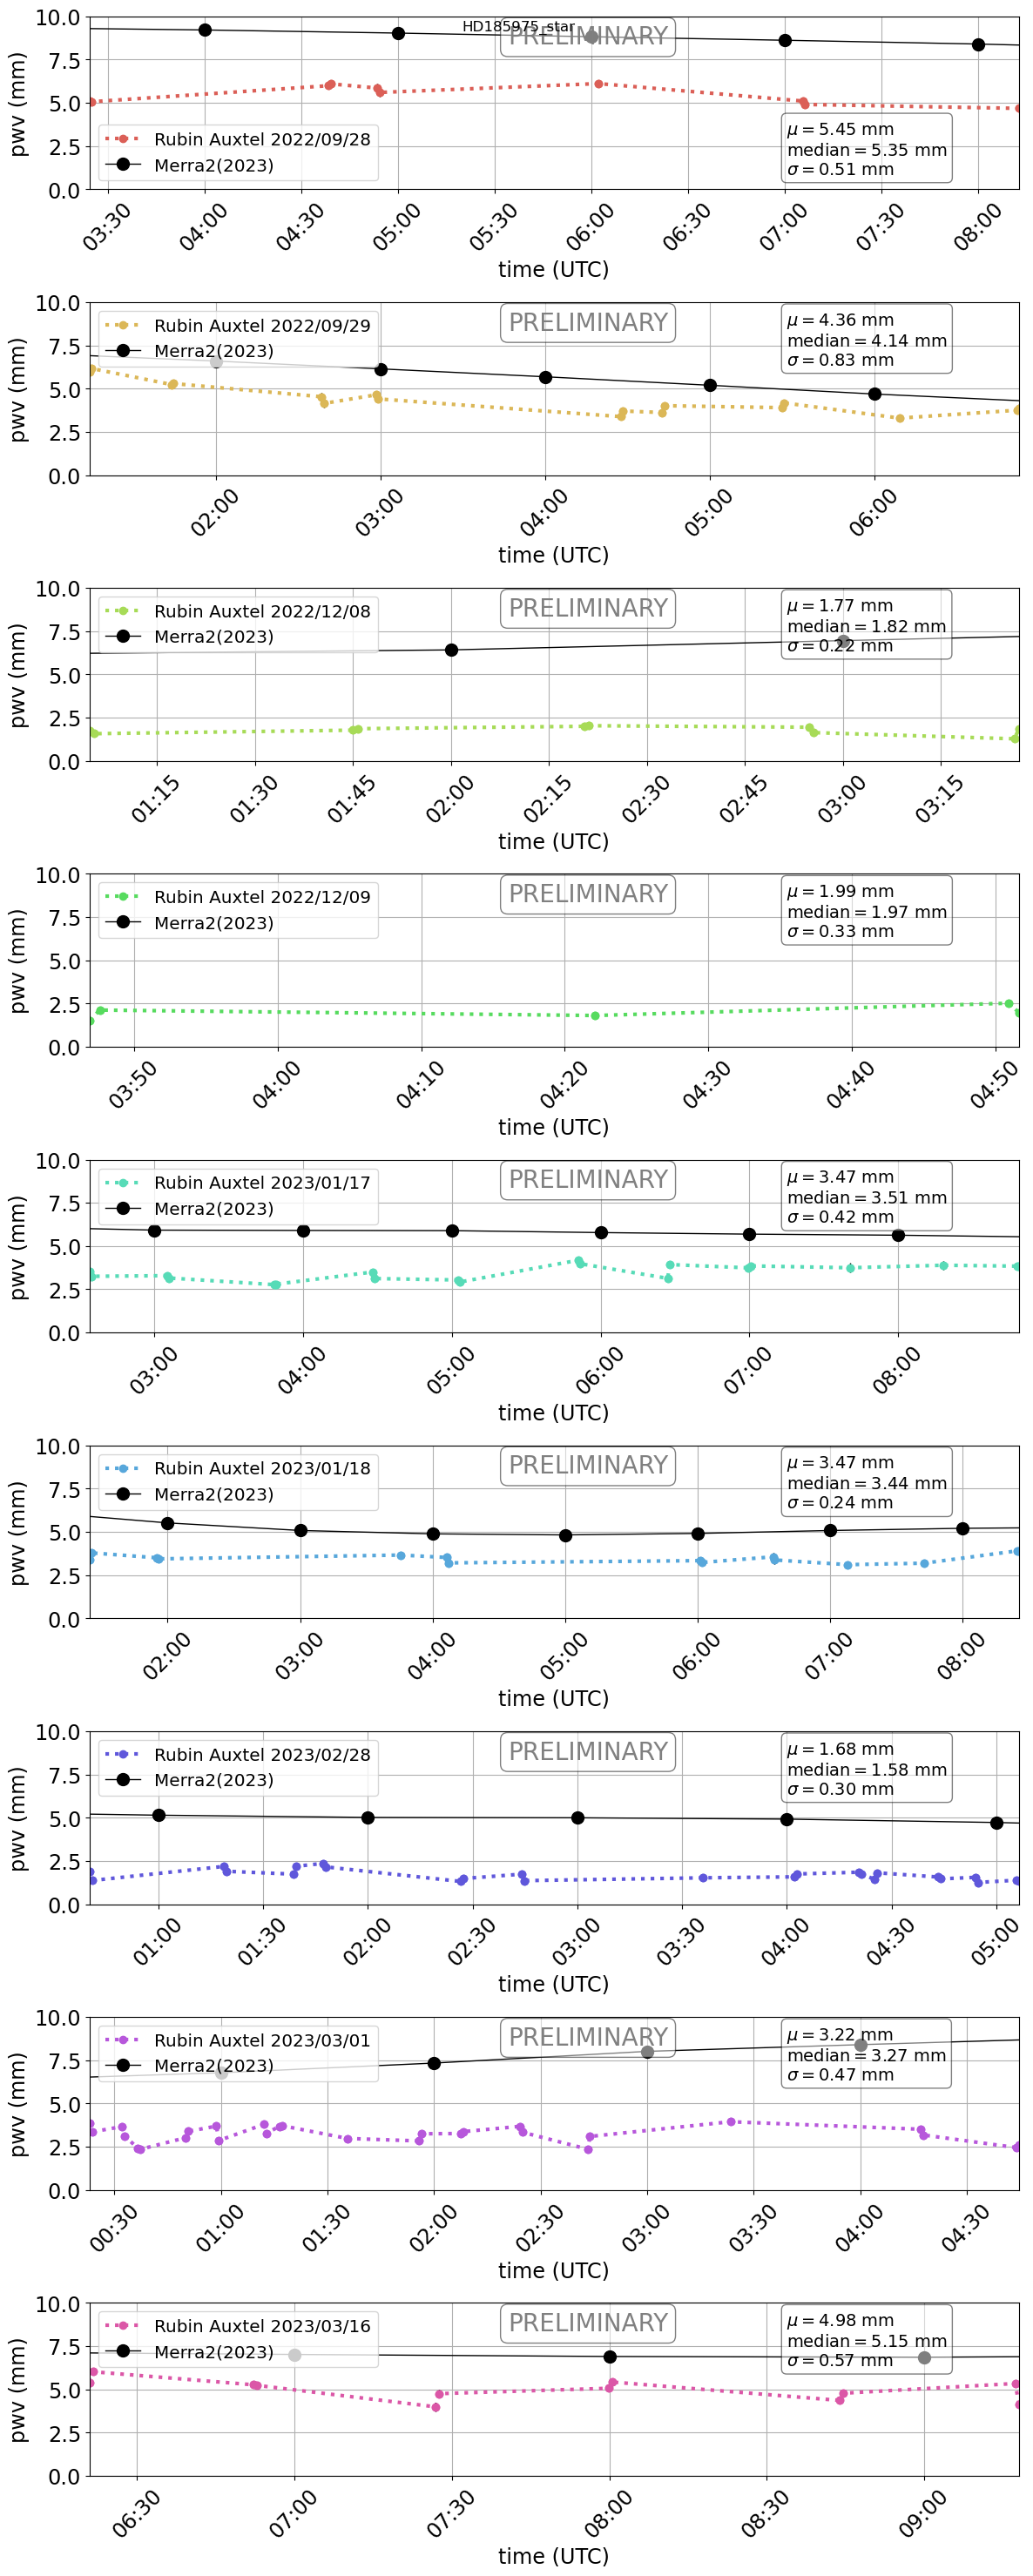

In [60]:
fig = plt.figure(figsize=(12,30))

gs = gridspec.GridSpec(9, 1,height_ratios=[1,1,1,1,1,1,1,1,1],figure=fig)


for idx,infos in enumerate(all_df):
    
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    numbers = infos['number'].values
    
    #pwv= infos['pwv_avg'].values
    #epwv= infos['pwv_sig'].values
    
    pwv= infos['pwv_1'].values
    epwv= infos['epwv_1'].values
    
    
    mu = pwv.mean()
    median = np.median(pwv)
    sigma =pwv.std()
    
   
    

    N= len(numbers)
    if N<1:
        continue
  
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]

    # convert to matplotlib date representation
    start = mdates.date2num(startTime)
    end = mdates.date2num(endTime)
    width = end - start

   
    
    ax= fig.add_subplot(gs[idx,0])
    
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
 
  
    ax.plot(all_datetime,pwv,'r:o',color=hls_colors[idx],lw=3,label="Rubin Auxtel " + tags[idx])
    ax.errorbar(all_datetime,pwv,yerr=epwv,fmt='o',color=hls_colors[idx],ecolor="k",lw=1,alpha=1)
    
    ax.plot(all_merra2_datetime,pwv_merra2 ,'k-o',markersize=10,lw=1,label="Merra2(2023)")
    
    ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel("time (UTC)")
    ax.set_ylabel("pwv (mm)")
    if idx == 0:
        ax.legend(loc='lower left')
    else:
        ax.legend(loc='upper left')
        
        
    textstr = '\n'.join((
    r'$\mu=%.2f$ mm' % (mu, ),
    r'$\mathrm{median}=%.2f$ mm' % (median, ),
    r'$\sigma=%.2f$ mm' % (sigma, )))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    if idx ==0:
        ax.text(0.75, 0.40, textstr, transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
    else:
        ax.text(0.75, 0.95, textstr, transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
        
    ax.text(0.45, 0.95, "PRELIMINARY", transform=ax.transAxes,color="grey" ,fontsize=20,verticalalignment='top', bbox=props)
        
    ax.set_xlim(start,end)
 
    ax.grid()
    ax.set_ylim(0.,10.)


plt.suptitle(tag_stars)
plt.tight_layout()
figname = f"fig_pwv_prelim-2023_{tag_stars}.png"
plt.savefig(figname)
plt.show()
    

# Compute average per night

## PWV

In [61]:
all_nights_pwvauxtel = np.zeros((len(all_df),3))
all_nights_pwvmerra2 = np.zeros((len(all_df),3))
all_night_N = np.zeros(len(all_df))
all_labels = []

for idx,infos in enumerate(all_df):
    
    all_night_N[idx] = len(infos) 
    all_labels.append(tags[idx])
    
    if len(infos) == 0:
        all_nights_pwvauxtel[idx,0] = np.nan
        all_nights_pwvauxtel[idx,1] = np.nan
        all_nights_pwvauxtel[idx,2] = np.nan
        
        all_nights_pwvmerra2[idx,0] = np.nan
        all_nights_pwvmerra2[idx,1] = np.nan
        all_nights_pwvmerra2[idx,2] = np.nan
        
        continue
        
    
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    numbers = infos['number'].values
    
    pwv= infos['pwv_avg'].values
    epwv= infos['pwv_sig'].values
    
    
    
    mu = pwv.mean()
    median = np.median(pwv)
    sigma =pwv.std()
    
    all_nights_pwvauxtel[idx,0] = mu
    all_nights_pwvauxtel[idx,1] = median
    all_nights_pwvauxtel[idx,2] = sigma
        

    # Create rectangle x coordinates
    startTime = all_datetime[0]
    endTime =  all_datetime[-1]
    
    
    night_pwv_merra2 = []
    for idx_m2,dattim_m2 in enumerate(all_merra2_datetime):
        if dattim_m2 >= startTime and dattim_m2 <= endTime:
            night_pwv_merra2.append(pwv_merra2.iloc[idx_m2]) 
        
    night_pwv_merra2=np.array(night_pwv_merra2)
    
    mu_m = night_pwv_merra2.mean()
    median_m = np.median(night_pwv_merra2)
    sigma_m =night_pwv_merra2.std()
    
    all_nights_pwvmerra2[idx,0] = mu_m
    all_nights_pwvmerra2[idx,1] = median_m
    all_nights_pwvmerra2[idx,2] = sigma_m
    
    

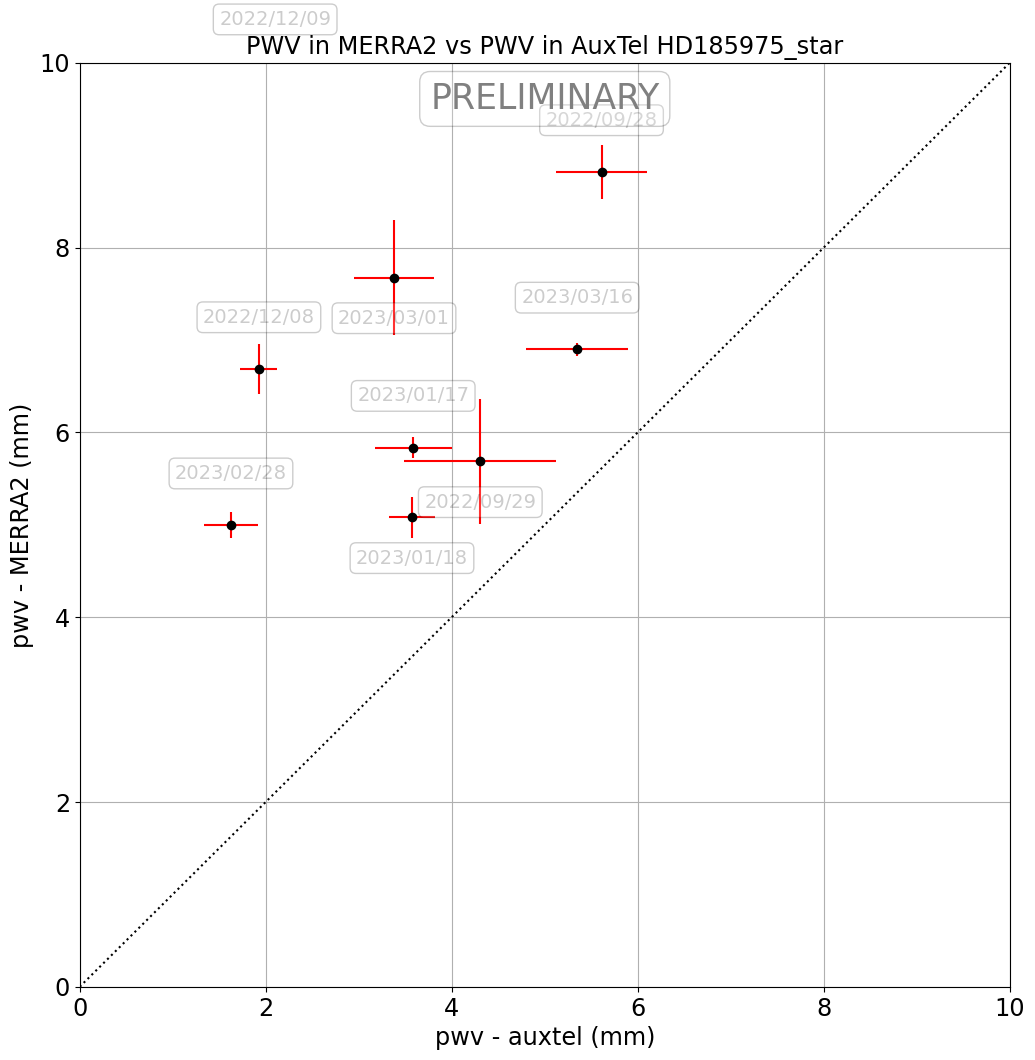

In [31]:
fig = plt.figure(figsize=(12,12))
props = dict(boxstyle='round', facecolor='white', alpha=0.2)

ax=fig.add_subplot(1,1,1)

ax.errorbar(all_nights_pwvauxtel[:,1],all_nights_pwvmerra2[:,1],xerr=all_nights_pwvauxtel[:,2], yerr=all_nights_pwvmerra2[:,2],marker="o",ls='none',ecolor="r",color="k")
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_title(f"PWV in MERRA2 vs PWV in AuxTel {tag_stars}")
ax.set_xlabel("pwv - auxtel (mm)")
ax.set_ylabel("pwv - MERRA2 (mm)")
ax.plot([0,10],[0,10],"k:")

for idx in range(len(all_nights_pwvauxtel[:,1])):
    
    if all_night_N[idx] == 0:
        continue
    
    xx=all_nights_pwvauxtel[idx,1]
    yy=all_nights_pwvmerra2[idx,1]
   
    if idx%2==0:
        yy+=0.5
    else:
        yy-=0.5
    
    
    #ax.text(xx, yy, tags[idx], transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
    ax.text(xx, yy, all_labels[idx], fontsize=14,horizontalalignment='center', bbox=props,alpha=0.2)
    
ax.text(0.5, 0.95, "PRELIMINARY", transform=ax.transAxes,color="grey" ,fontsize=25,horizontalalignment='center', bbox=props)

ax.grid()
figname = f"fig_pwvm2vspwvaux_prelim_{tag_stars}.png"
plt.savefig(figname)
plt.show()

## Find pairs

In [32]:
all_df[0].columns

Index(['index', 'exposure', 'spec_date_obs', 'spec_target_label',
       'spec_filter_label', 'spec_airmass', 'spec_pressure',
       'spec_temperature', 'spec_humidity', 'spec_hour_angle',
       'spec_parallactic_angle', 'spec_camera_angle', 'spec_order',
       'spec_header_target', 'spec_header_redshift', 'spec_header_grating',
       'spec_header_rotangle', 'spec_header_d2ccd', 'spec_header_lshift',
       'spec_header_parangle', 'spec_header_targetx', 'spec_header_targety',
       'spec_header_lbda_ref', 'spec_header_pixshift', 'spec_header_psf_reg',
       'spec_header_trace_r', 'spec_header_chi2_fit', 'spec_header_a2_fit',
       'spec_header_am_fit', 'spec_header_meanfwhm', 'spec_header_version',
       'spec_header_rebin', 'spec_header_date-obs', 'spec_header_exptime',
       'spec_header_airmass', 'spec_header_dec', 'spec_header_ha',
       'spec_header_outtemp', 'spec_header_outpress', 'spec_header_outhum',
       'spec_header_filter', 'spec_header_cam_rot', 'spec_header_s_

In [33]:
all_df[0]

,index,exposure,spec_date_obs,spec_target_label,spec_filter_label,spec_airmass,spec_pressure,spec_temperature,spec_humidity,spec_hour_angle,...,egrey_3,SNR_3,chi2_4,pwv_4,grey_4,epwv_4,egrey_4,SNR_4,pwv_avg,pwv_sig
2,20,2022092800469,2022-09-29T03:24:22.341002192Z,HD185975,empty,1.865924,0,0,0,-319.739723,...,0.002900,0.059028,16.904583,7.041975,1.025375,0.377098,0.002262,0.060654,5.418314,0.958092
3,21,2022092800470,2022-09-29T03:25:05.327496966Z,HD185975,empty,1.866183,0,0,0,-319.556360,...,0.002779,0.193537,21.574229,6.782923,1.013769,0.415315,0.002528,0.055422,5.321925,0.916966
4,36,2022092800568,2022-09-29T04:38:23.799991948Z,HD185975,empty,1.899071,0,0,0,-300.869912,...,0.001462,0.063070,5.230787,7.273324,1.031517,0.219273,0.001341,0.001260,6.209648,0.836178
5,37,2022092800569,2022-09-29T04:39:06.609505316Z,HD185975,empty,1.899431,0,0,0,-300.691076,...,0.002778,0.121342,16.451951,7.157404,1.022924,0.376610,0.002277,0.017676,6.256612,0.493589
6,40,2022092800591,2022-09-29T04:53:33.118002418Z,HD185975,empty,1.907080,0,0,0,-297.004658,...,0.003438,0.110994,29.719152,6.738912,1.011864,0.503671,0.003081,0.086214,5.930345,0.416290
7,41,2022092800592,2022-09-29T04:54:15.923498584Z,HD185975,empty,1.907460,0,0,0,-296.825773,...,0.002947,0.072004,20.801114,6.840630,1.020976,0.411419,0.002537,0.014295,5.801865,0.578771
8,54,2022092800688,2022-09-29T06:02:11.042007314Z,HD185975,empty,1.947546,0,0,0,-279.528447,...,0.001792,0.074073,6.229158,7.047708,1.029078,0.229006,0.001418,0.003778,6.301525,0.634696
10,68,2022092800779,2022-09-29T07:05:29.210505104Z,HD185975,empty,1.989145,0,0,0,-263.387970,...,0.003417,0.315552,25.738448,6.224777,1.025230,0.410000,0.002690,0.032833,5.276435,0.530233
11,69,2022092800780,2022-09-29T07:06:12.019007098Z,HD185975,empty,1.989618,0,0,0,-263.208941,...,0.003374,0.204718,24.522311,6.316157,1.027940,0.402365,0.002656,0.007100,5.106944,0.719481
12,84,2022092800878,2022-09-29T08:12:33.412991693Z,HD185975,empty,2.034157,0,0,0,-246.318762,...,0.003412,0.120880,19.877865,5.740863,1.018254,0.349759,0.002380,0.004545,4.893777,0.582200


In [34]:
sorted(all_datetime)

[datetime.datetime(2023, 3, 17, 6, 20, 56, 82001),
 datetime.datetime(2023, 3, 17, 6, 21, 39, 74005),
 datetime.datetime(2023, 3, 17, 6, 52, 6, 172503),
 datetime.datetime(2023, 3, 17, 6, 52, 49, 175496),
 datetime.datetime(2023, 3, 17, 7, 26, 52, 619493),
 datetime.datetime(2023, 3, 17, 7, 27, 35, 585005),
 datetime.datetime(2023, 3, 17, 7, 59, 53, 341001),
 datetime.datetime(2023, 3, 17, 8, 0, 36, 347991),
 datetime.datetime(2023, 3, 17, 8, 43, 51, 125005),
 datetime.datetime(2023, 3, 17, 8, 44, 34, 193006),
 datetime.datetime(2023, 3, 17, 9, 17, 21, 585507),
 datetime.datetime(2023, 3, 17, 9, 18, 4, 497499)]

In [35]:
np.argsort(all_datetime)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [36]:
for idx,infos in enumerate(all_df):
    all_datetime = [ Time(str_time).to_datetime() for str_time in infos['spec_date_obs'] ]
    
    print(idx,"argsort=",np.argsort(all_datetime))
    nn=len(all_datetime)
    difftimes = [ (all_datetime[n+1]-all_datetime[n]).seconds for n in range(nn-1) ]
    print("difftime",difftimes)
                 
    

0 argsort= [0 1 2 3 4 5 6 7 8 9]
difftime [42, 4398, 42, 866, 42, 4075, 3798, 42, 3981]
1 argsort= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
difftime [42, 1744, 42, 3240, 42, 1143, 42, 5302, 42, 867, 42, 2581, 42, 2518, 2565, 42]
2 argsort= [0 1 2 3 4 5 6 7 8 9]
difftime [42, 2377, 42, 2080, 42, 2023, 42, 1841, 42]
3 argsort= [0 1 2 3 4]
difftime [42, 2072, 1728, 42]
4 argsort= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
difftime [42, 1846, 42, 2554, 42, 2326, 42, 2030, 42, 2865, 42, 2123, 42, 1914, 42, 2407, 2273, 1781, 42]
5 argsort= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
difftime [42, 1788, 43, 6590, 1241, 42, 6855, 42, 1926, 42, 1987, 2074, 2533, 42]
6 argsort= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
difftime [43, 2266, 42, 1150, 42, 474, 42, 2321, 42, 1006, 42, 3068, 1565, 43, 1073, 42, 225, 42, 1047, 42, 595, 43, 666, 42]
7 argsort= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 

In [62]:
def FindPairs(df):
    all_datetime = [ Time(str_time).to_datetime() for str_time in df['spec_date_obs'] ]
    nn=len(all_datetime)
    difftimes = [ (all_datetime[n+1]-all_datetime[n]).seconds for n in range(nn-1) ]
    id_pairs = []
    
    for idx,difft in   enumerate(difftimes):
        if difft<60:
            id_pairs.append(idx)
            
    all_dpwv = []
    for idx in id_pairs:
        #pwv1 = df.iloc[idx]['pwv_avg']
        #pwv2 = df.iloc[idx+1]['pwv_avg']
        
        
        pwv1 = df.iloc[idx]['pwv_1']
        pwv2 = df.iloc[idx+1]['pwv_1']
        
        
        
        dpwv = pwv1-pwv2
        all_dpwv.append(dpwv)       
    
    return np.array(id_pairs),np.array(all_dpwv)
    

In [63]:
all_diffpwv = []
for df in all_df:
    idxs_pairs, pwv_diff = FindPairs(df)
    all_diffpwv.append(pwv_diff)

In [64]:
all_diffpwv = np.concatenate(all_diffpwv,axis=0)

In [73]:
the_mean =all_diffpwv.mean()

In [74]:
the_std = all_diffpwv.std()

In [75]:
the_median = np.median(all_diffpwv)

In [76]:
textstr = '\n'.join((
    r'$\mu=%.2f$' % (the_mean, ),
    r'$\mathrm{median}=%.2f$' % (the_median, ),
    r'$\sigma=%.2f$' % (the_std, )))

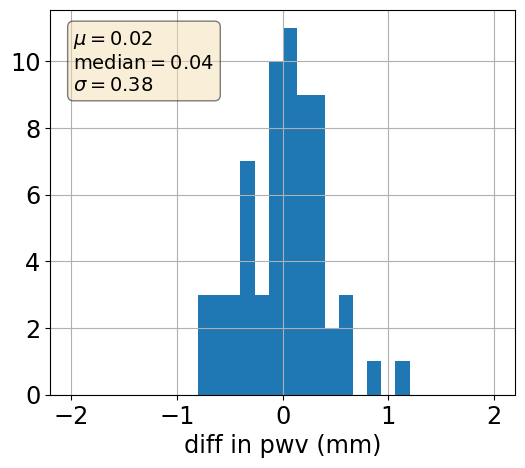

In [80]:
fig = plt.figure(figsize=(6,5))
ax=fig.add_subplot(1,1,1)
h = ax.hist(all_diffpwv,bins=30,range=(-2,2));

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax.set_xlabel("diff in pwv (mm)")
ax.grid()

In [44]:
df= all_df[0]

In [45]:
df.columns

Index(['index', 'exposure', 'spec_date_obs', 'spec_target_label',
       'spec_filter_label', 'spec_airmass', 'spec_pressure',
       'spec_temperature', 'spec_humidity', 'spec_hour_angle',
       'spec_parallactic_angle', 'spec_camera_angle', 'spec_order',
       'spec_header_target', 'spec_header_redshift', 'spec_header_grating',
       'spec_header_rotangle', 'spec_header_d2ccd', 'spec_header_lshift',
       'spec_header_parangle', 'spec_header_targetx', 'spec_header_targety',
       'spec_header_lbda_ref', 'spec_header_pixshift', 'spec_header_psf_reg',
       'spec_header_trace_r', 'spec_header_chi2_fit', 'spec_header_a2_fit',
       'spec_header_am_fit', 'spec_header_meanfwhm', 'spec_header_version',
       'spec_header_rebin', 'spec_header_date-obs', 'spec_header_exptime',
       'spec_header_airmass', 'spec_header_dec', 'spec_header_ha',
       'spec_header_outtemp', 'spec_header_outpress', 'spec_header_outhum',
       'spec_header_filter', 'spec_header_cam_rot', 'spec_header_s_

array([[<Axes: title={'center': 'chi2_1'}>]], dtype=object)

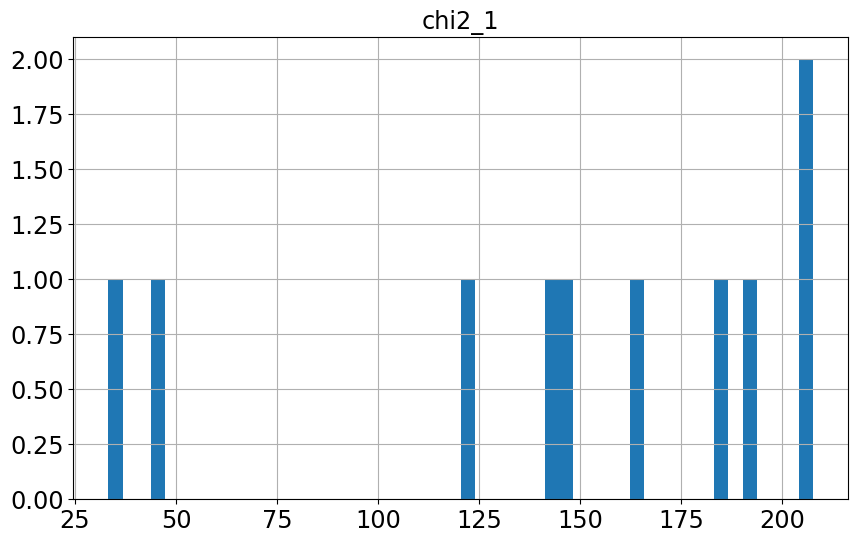

In [46]:
df.hist('chi2_1',bins=50)

In [47]:
df_merge = pd.concat(all_df)

array([[<Axes: title={'center': 'chi2_3'}>]], dtype=object)

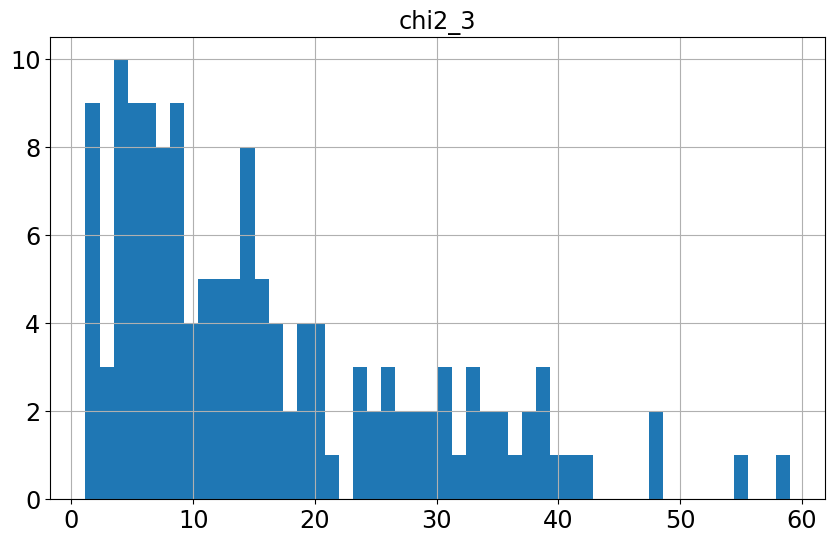

In [48]:
df_merge.hist('chi2_3',bins=50)

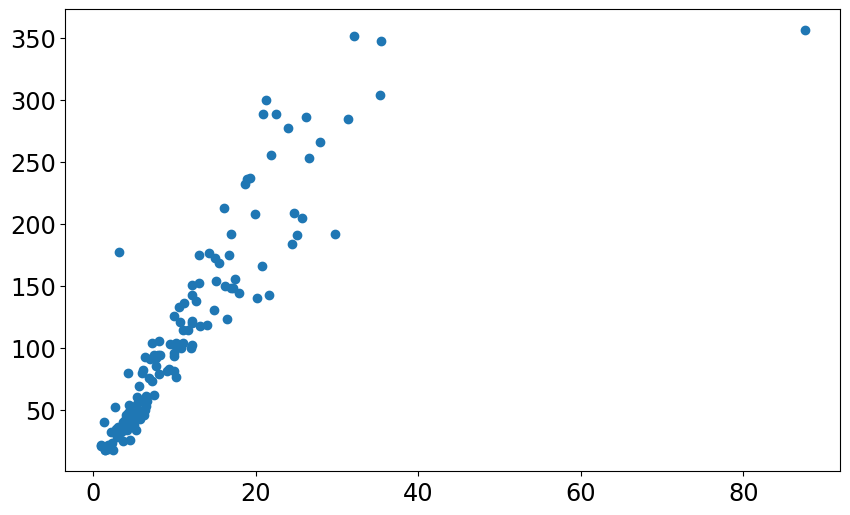

In [49]:
plt.scatter(df_merge.chi2_4,df_merge.chi2_1)

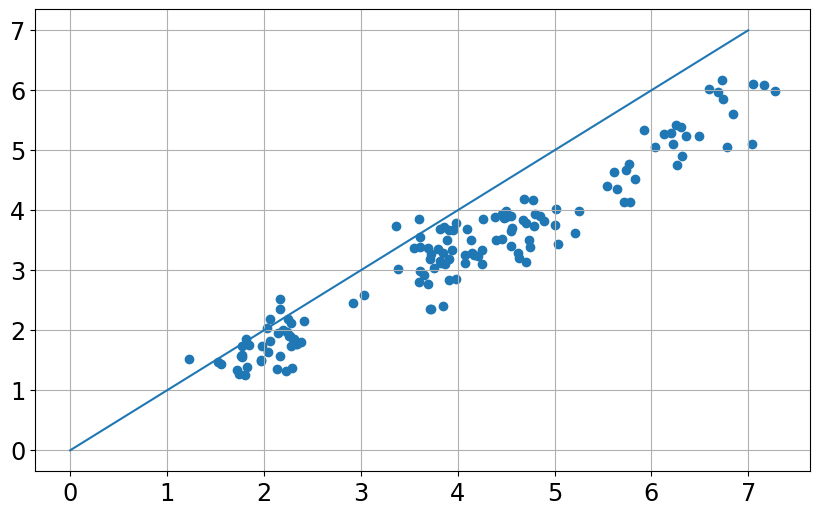

In [55]:
plt.scatter(df_merge.pwv_4,df_merge.pwv_1)
plt.grid()
plt.plot([0,7],[0,7])